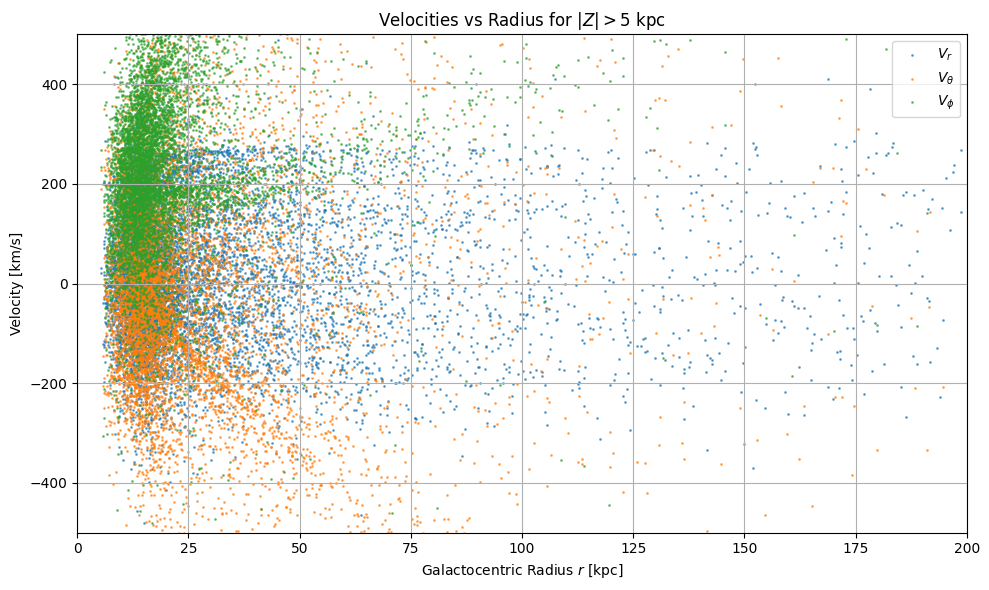

In [51]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, Galactocentric
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = r"TRGB_Gaia_new-result.csv"
cep = pd.read_csv(file_path)

# Drop rows with missing values in required columns
required_cols = ['ra', 'dec', 'parallax', 'pmra', 'pmdec', 'radial_velocity', 'l', 'b','pmra']
cep_clean = cep.dropna(subset=required_cols)

# Convert to astropy quantities
ra_array = np.array(cep_clean['ra']) * u.degree
dec_array = np.array(cep_clean['dec']) * u.degree
distance_array = (np.array(cep_clean['parallax']) * u.mas).to(u.kpc, u.parallax())
pm_ra_cosdec_array = np.array(cep_clean['pmra']) * u.mas / u.yr
pm_dec_array = np.array(cep_clean['pmdec']) * u.mas / u.yr
radial_velocity_array = np.array(cep_clean['radial_velocity']) * u.km / u.s
l = np.array(cep_clean['l']) * u.degree
b = np.array(cep_clean['b']) * u.degree

# Constants
U_sun, V_sun, W_sun = 11.1 * u.km / u.s, 12.24 * u.km / u.s, 7.25 * u.km / u.s
V0 = 190 * u.km / u.s
R0 = -8.3 * u.kpc

# Function to transform coordinates
def transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity, l, b):
    c = SkyCoord(ra=ra, dec=dec, distance=distance, pm_ra_cosdec=pm_ra_cosdec,
                 pm_dec=pm_dec, radial_velocity=radial_velocity)
    g = c.transform_to(Galactocentric(galcen_distance=R0,
                                      z_sun=0.020 * u.kpc,
                                      galcen_v_sun=[U_sun, V_sun, W_sun]))
    
    x, y, z = g.x.value, g.y.value, g.z.value
    vx, vy, vz = g.v_x.value, g.v_y.value, g.v_z.value
 
    # Spherical velocities
# Xue paper : 
    # Cartesian coordinates
    X, Y, Z = x, y, z
    U, V, W = vx, vy, vz  # Cartesian velocities


    r = np.sqrt(X**2 + Y**2 + Z**2)
    phi = np.arctan2(Y, X)
    theta = np.pi/2 - np.arctan2(Z, np.sqrt(X**2 + Y**2))

    # Spherical velocities
    V_r = (U * np.cos(phi) + V * np.sin(phi)) * np.sin(theta) + W * np.cos(theta)
    V_theta = (U * np.cos(phi) + V * np.sin(phi)) * np.cos(theta) - W * np.sin(theta)
    V_phi = U * np.sin(phi) - V * np.cos(phi) 

    return {
        "r": r,
        "z": z,
        "V_r": V_r,
        "V_theta": V_theta,
        "V_phi": V_phi
    }

# Call the function
results = transform_to_galactocentric(ra_array, dec_array, distance_array,
                                      pm_ra_cosdec_array, pm_dec_array,
                                      radial_velocity_array, l, b)

# Convert results to numpy arrays
r = np.array(results["r"])
z = np.array(results["z"])
V_r = np.array(results["V_r"])
V_theta = np.array(results["V_theta"])
V_phi = np.array(results["V_phi"])

# Apply |Z| > 5 kpc filter
mask = (np.abs(r) < 200) & (np.abs(z) > 5)


# Plot the velocity components vs r for |z| > 5 kpc
plt.figure(figsize=(10, 6))
plt.scatter(r[mask], V_r[mask], s=1, label=r'$V_r$', alpha=0.6)
plt.scatter(r[mask], V_theta[mask], s=1, label=r'$V_\theta$', alpha=0.6)
plt.scatter(r[mask], V_phi[mask], s=1, label=r'$V_\phi$', alpha=0.6)

plt.xlabel('Galactocentric Radius $r$ [kpc]')
plt.ylabel('Velocity [km/s]')
plt.xlim(0, 200)
plt.ylim(-500, 500)
plt.title('Velocities vs Radius for $|Z| > 5$ kpc')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




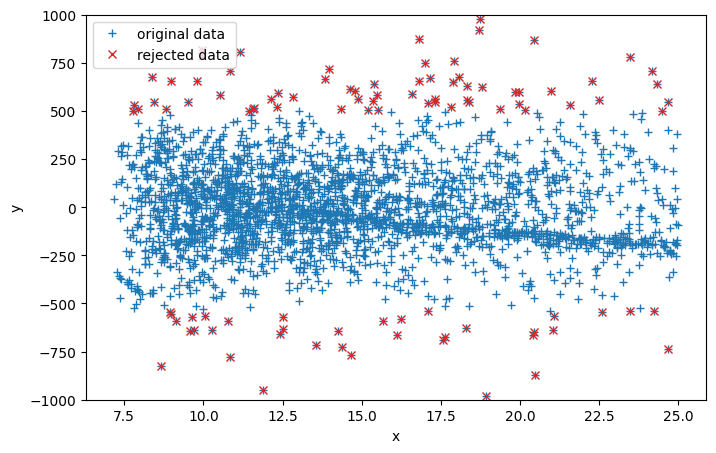

In [45]:
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
from astropy.stats import sigma_clip, mad_std

# Generate fake data that has a mean of 0 and standard deviation of 0.2 with outliers

x = r[mask]
y = V_theta[mask]
# c = stats.bernoulli.rvs(0.35, size=x.shape)
# y += (rng.normal(0., 0.2, x.shape) +
#       c * rng.normal(3.0, 5.0, x.shape))

filtered_data = sigma_clip(y, sigma=2.5, maxiters=100, stdfunc=mad_std)

# plot the original and rejected data
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x, y, '+', color='#1f77b4', label="original data")
ax.plot(x[filtered_data.mask], y[filtered_data.mask], 'x',
         color='#d62728', label="rejected data")
plt.ylim(-1000,1000)
ax.set(xlabel='x', ylabel='y')
ax.legend(loc=2, numpoints=1)

In [20]:
import sys
!{sys.executable} -m pip install panel

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\Lenovo\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [27]:
import sys
!{sys.executable} -m pip install jupyter_bokeh


You should consider upgrading via the 'c:\Users\Lenovo\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
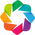

BokehModel(combine_events=True, render_bundle={'docs_json': {'163fc01b-bd93-4067-be97-37b192d67c98': {'version…

In [54]:
import numpy as np
import pandas as pd
import panel as pn
import holoviews as hv
from bokeh.models import ColumnDataSource
from astropy.stats import sigma_clip, mad_std

hv.extension('bokeh')
pn.extension()


x = r[mask]
y = V_theta[mask]

# -------- Sigma Clip the data --------
clipped_y = sigma_clip(y, sigma=3, maxiters=10, stdfunc=mad_std)
mask_good = ~clipped_y.mask  # Boolean array: True where data is NOT clipped
x_good = x[mask_good]
y_good = clipped_y.data[mask_good]

# -------- Create DataFrame for Interactive Plotting --------
df = pd.DataFrame({'r': x_good, 'V_r': y_good}).reset_index(drop=True)

# -------- Holoviews Interactive Plot --------
pt = hv.Points(df, kdims=['r', 'V_r']).opts(
    marker='x', size=5,
    tools=['hover', 'box_select', 'lasso_select', 'reset'],
    height=600, width=1000
)

fig = hv.render(pt)
source = fig.select({'type': ColumnDataSource})

# -------- Button to Remove Selected Points --------
bt = pn.widgets.Button(name='Remove selected')

def rm_sel(evt):
    sel = source.selected.indices
    if sel:
        idx = df.iloc[sel].index
        df.drop(idx, inplace=True)
        df.reset_index(drop=True, inplace=True)
        source.data = {
            'r': df['r'].values,
            'V_r': df['V_r'].values
        }
        source.selected.indices = []

bt.on_click(rm_sel)

# -------- Layout --------
app = pn.Column(
    "# Interactive Sigma-Clipped Data",
    "Use box or lasso select and click to remove outliers manually.",
    fig,
    bt
)

# In Jupyter Notebook
app

# In a script, use: app.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Example input arrays (user-supplied in practice)
# r = np.array([...]); V_r = np.array([...]); V_theta = np.array([...]); V_phi = np.array([...])
# mask = np.array([...], dtype=bool)

# Filter valid data
r_valid     = r[mask]
V_r_valid   = V_r[mask]
V_th_valid  = V_theta[mask]
V_ph_valid  = V_phi[mask]

# --- Define robust_sigma function (Tukey biweight estimator) ---
def robust_sigma(data, zero=False):
    """
    Resistant estimate of dispersion using Tukey biweight.
    For an uncontaminated distribution this is similar to std deviation.
    """
    y = np.array(data, dtype=float).ravel()
    if y.size == 0:
        return np.nan
    # Initial location
    if zero:
        y0 = 0.0
    else:
        y0 = np.median(y)
    dy = y - y0
    mad = np.median(np.abs(dy)) / 0.6745  # approximate to 1-sigma for normal dist
    # If MAD is zero, fall back to mean absolute dev
    if mad < 1e-20:
        mad = np.mean(np.abs(dy)) / 0.80
        if mad < 1e-20:
            return 0.0
    # Tukey biweight
    u = dy / (6.0 * mad)
    mask_u = np.abs(u) <= 1.0
    if mask_u.sum() < 3:
        # Not enough points in the core of distribution
        return np.nan
    u2 = u[mask_u]**2
    y_core = y[mask_u]
    numerator = np.sum((y_core - y0)**2 * (1 - u2)**4)
    den1 = np.sum((1 - u2) * (1 - 5.0 * u2))
    n = y.size
    sigma2 = n * numerator / (den1 * (den1 - 1))
    return np.sqrt(sigma2) if sigma2 > 0 else 0.0

# --- Bin the radial data (Freedman-Diaconis rule) ---
bin_edges = np.histogram_bin_edges(r_valid, bins=75)
# Compute bin centers for plotting
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])

# Initialize arrays for results
n_bins = len(bin_centers)
sigma_Vr   = np.full(n_bins, np.nan)
sigma_Vt   = np.full(n_bins, np.nan)
sigma_Vp   = np.full(n_bins, np.nan)
median_Vr  = np.full(n_bins, np.nan)
median_Vt  = np.full(n_bins, np.nan)
median_Vp  = np.full(n_bins, np.nan)

# Compute robust sigma and median in each radial bin
for i in range(n_bins):
    # Select points in current radial bin
    in_bin = (r_valid >= bin_edges[i]) & (r_valid < bin_edges[i+1])
    if not np.any(in_bin):
        continue
    Vr_bin = V_r_valid[in_bin]
    Vt_bin = V_th_valid[in_bin]
    Vp_bin = V_ph_valid[in_bin]
    # Compute medians (always possible if at least one point)
    median_Vr[i] = np.median(Vr_bin) if Vr_bin.size > 0 else np.nan
    median_Vt[i] = np.median(Vt_bin) if Vt_bin.size > 0 else np.nan
    median_Vp[i] = np.median(Vp_bin) if Vp_bin.size > 0 else np.nan
    # Compute robust sigmas only if enough points
    if Vr_bin.size >= 3:
        sigma_Vr[i] = robust_sigma(Vr_bin, zero=False)
    if Vt_bin.size >= 3:
        sigma_Vt[i] = robust_sigma(Vt_bin, zero=False)
    if Vp_bin.size >= 3:
        sigma_Vp[i] = robust_sigma(Vp_bin, zero=False)

# --- Initialize arrays for Poissonian errors ---
error_sigma_Vr = np.full(n_bins, np.nan)
error_sigma_Vt = np.full(n_bins, np.nan)
error_sigma_Vp = np.full(n_bins, np.nan)

# --- Compute robust sigma, median and error in each radial bin ---
for i in range(n_bins):
    # Select points in current radial bin
    in_bin = (r_valid >= bin_edges[i]) & (r_valid < bin_edges[i+1])
    N = np.sum(in_bin)
    if N < 1:
        continue

    Vr_bin = V_r_valid[in_bin]
    Vt_bin = V_th_valid[in_bin]
    Vp_bin = V_ph_valid[in_bin]

    # Medians
    median_Vr[i] = np.median(Vr_bin)
    median_Vt[i] = np.median(Vt_bin)
    median_Vp[i] = np.median(Vp_bin)

    # Robust sigmas and their Poissonian errors
    if N >= 3:
        sigma_Vr[i] = robust_sigma(Vr_bin, zero=False)
        error_sigma_Vr[i] = sigma_Vr[i] / np.sqrt(2 * (N - 1))

        sigma_Vt[i] = robust_sigma(Vt_bin, zero=False)
        error_sigma_Vt[i] = sigma_Vt[i] / np.sqrt(2 * (N - 1))

        sigma_Vp[i] = robust_sigma(Vp_bin, zero=False)
        error_sigma_Vp[i] = sigma_Vp[i] / np.sqrt(2 * (N - 1))



# --- Plot the robust dispersion profiles with error bars ---
plt.figure(figsize=(6,4))

plt.errorbar(bin_centers, sigma_Vr, yerr=error_sigma_Vr, fmt='o', label=r'$\sigma(V_r)$', capsize=3)
plt.errorbar(bin_centers, sigma_Vt, yerr=error_sigma_Vt, fmt='s', label=r'$\sigma(V_\theta)$', capsize=3)
plt.errorbar(bin_centers, sigma_Vp, yerr=error_sigma_Vp, fmt='^', label=r'$\sigma(V_\phi)$', capsize=3)

plt.xlabel('Radius $r$')
plt.ylabel('Robust Dispersion (velocity)')
plt.legend()
plt.title('Robust Velocity Dispersions vs. Radius')
plt.ylim(0, 500)
plt.xlim(0, 100)
plt.tight_layout()


# --- Plot the median velocity profiles ---
plt.figure(figsize=(6,4))
plt.plot(bin_centers, median_Vr, marker='o', linestyle='-', label=r'$\mathrm{median}(V_r)$')
plt.plot(bin_centers, median_Vt, marker='s', linestyle='-', label=r'$\mathrm{median}(V_\theta)$')
plt.plot(bin_centers, median_Vp, marker='^', linestyle='-', label=r'$\mathrm{median}(V_\phi)$')
plt.xlabel('Radius $r$')
plt.ylabel('Median Velocity')
plt.legend()
plt.title('Median Velocity Components vs. Radius')
plt.xlim(0,100)
plt.tight_layout()

plt.show()


NameError: name 'r' is not defined

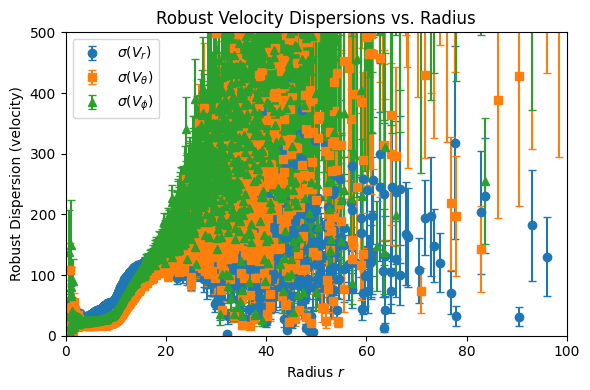

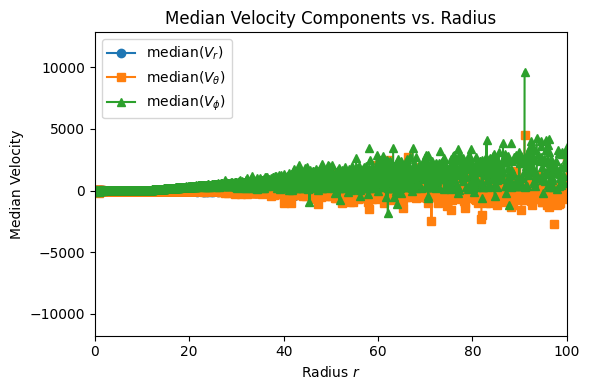

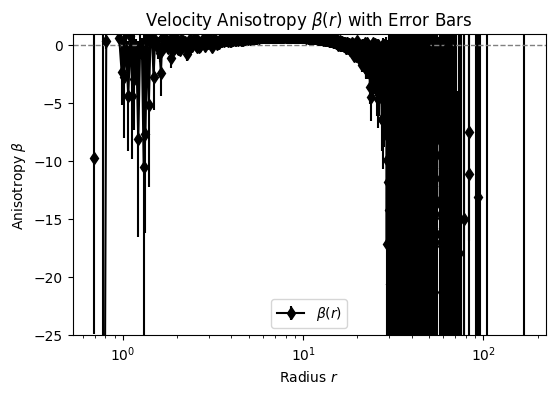

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Example input arrays (user-supplied in practice)
# r = np.array([...]); V_r = np.array([...]); V_theta = np.array([...]); V_phi = np.array([...])
# mask = np.array([...], dtype=bool)

# Filter valid data
r_valid     = r[mask]
V_r_valid   = V_r[mask]
V_th_valid  = V_theta[mask]
V_ph_valid  = V_phi[mask]

# --- Define robust_sigma function (Tukey biweight estimator) ---
def robust_sigma(data, zero=False):
    """
    Resistant estimate of dispersion using Tukey biweight.
    For an uncontaminated distribution this is similar to std deviation.
    """
    y = np.array(data, dtype=float).ravel()
    if y.size == 0:
        return np.nan
    # Initial location
    if zero:
        y0 = 0.0
    else:
        y0 = np.median(y)
    dy = y - y0
    mad = np.median(np.abs(dy)) / 0.6745  # approximate to 1-sigma for normal dist
    # If MAD is zero, fall back to mean absolute dev
    if mad < 1e-20:
        mad = np.mean(np.abs(dy)) / 0.80
        if mad < 1e-20:
            return 0.0
    # Tukey biweight
    u = dy / (6.0 * mad)
    mask_u = np.abs(u) <= 1.0
    if mask_u.sum() < 3:
        # Not enough points in the core of distribution
        return np.nan
    u2 = u[mask_u]**2
    y_core = y[mask_u]
    numerator = np.sum((y_core - y0)**2 * (1 - u2)**4)
    den1 = np.sum((1 - u2) * (1 - 5.0 * u2))
    n = y.size
    sigma2 = n * numerator / (den1 * (den1 - 1))
    return np.sqrt(sigma2) if sigma2 > 0 else 0.0

# --- Bin the radial data (Freedman-Diaconis rule) ---
bin_edges = np.histogram_bin_edges(r_valid, bins='fd')
# Compute bin centers for plotting
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])

# Initialize arrays for results
n_bins = len(bin_centers)
sigma_Vr   = np.full(n_bins, np.nan)
sigma_Vt   = np.full(n_bins, np.nan)
sigma_Vp   = np.full(n_bins, np.nan)
median_Vr  = np.full(n_bins, np.nan)
median_Vt  = np.full(n_bins, np.nan)
median_Vp  = np.full(n_bins, np.nan)

# Compute robust sigma and median in each radial bin
for i in range(n_bins):
    # Select points in current radial bin
    in_bin = (r_valid >= bin_edges[i]) & (r_valid < bin_edges[i+1])
    if not np.any(in_bin):
        continue
    Vr_bin = V_r_valid[in_bin]
    Vt_bin = V_th_valid[in_bin]
    Vp_bin = V_ph_valid[in_bin]
    # Compute medians (always possible if at least one point)
    median_Vr[i] = np.median(Vr_bin) if Vr_bin.size > 0 else np.nan
    median_Vt[i] = np.median(Vt_bin) if Vt_bin.size > 0 else np.nan
    median_Vp[i] = np.median(Vp_bin) if Vp_bin.size > 0 else np.nan
    # Compute robust sigmas only if enough points
    if Vr_bin.size >= 3:
        sigma_Vr[i] = robust_sigma(Vr_bin, zero=False)
    if Vt_bin.size >= 3:
        sigma_Vt[i] = robust_sigma(Vt_bin, zero=False)
    if Vp_bin.size >= 3:
        sigma_Vp[i] = robust_sigma(Vp_bin, zero=False)

# --- Initialize arrays for Poissonian errors ---
error_sigma_Vr = np.full(n_bins, np.nan)
error_sigma_Vt = np.full(n_bins, np.nan)
error_sigma_Vp = np.full(n_bins, np.nan)

# --- Compute robust sigma, median and error in each radial bin ---
for i in range(n_bins):
    # Select points in current radial bin
    in_bin = (r_valid >= bin_edges[i]) & (r_valid < bin_edges[i+1])
    N = np.sum(in_bin)
    if N < 1:
        continue

    Vr_bin = V_r_valid[in_bin]
    Vt_bin = V_th_valid[in_bin]
    Vp_bin = V_ph_valid[in_bin]

    # Medians
    median_Vr[i] = np.median(Vr_bin)
    median_Vt[i] = np.median(Vt_bin)
    median_Vp[i] = np.median(Vp_bin)

    # Robust sigmas and their Poissonian errors
    if N >= 3:
        sigma_Vr[i] = robust_sigma(Vr_bin, zero=False)
        error_sigma_Vr[i] = sigma_Vr[i] / np.sqrt(2 * (N - 1))

        sigma_Vt[i] = robust_sigma(Vt_bin, zero=False)
        error_sigma_Vt[i] = sigma_Vt[i] / np.sqrt(2 * (N - 1))

        sigma_Vp[i] = robust_sigma(Vp_bin, zero=False)
        error_sigma_Vp[i] = sigma_Vp[i] / np.sqrt(2 * (N - 1))




# --- Plot the robust dispersion profiles with error bars ---
plt.figure(figsize=(6,4))

plt.errorbar(bin_centers, sigma_Vr, yerr=error_sigma_Vr, fmt='o', label=r'$\sigma(V_r)$', capsize=3)
plt.errorbar(bin_centers, sigma_Vt, yerr=error_sigma_Vt, fmt='s', label=r'$\sigma(V_\theta)$', capsize=3)
plt.errorbar(bin_centers, sigma_Vp, yerr=error_sigma_Vp, fmt='^', label=r'$\sigma(V_\phi)$', capsize=3)

plt.xlabel('Radius $r$')
plt.ylabel('Robust Dispersion (velocity)')
plt.legend()
plt.title('Robust Velocity Dispersions vs. Radius')
plt.ylim(0, 500)
plt.xlim(0, 100)
plt.tight_layout()
# --- Plot the median velocity profiles ---
plt.figure(figsize=(6,4))
plt.plot(bin_centers, median_Vr, marker='o', linestyle='-', label=r'$\mathrm{median}(V_r)$')
plt.plot(bin_centers, median_Vt, marker='s', linestyle='-', label=r'$\mathrm{median}(V_\theta)$')
plt.plot(bin_centers, median_Vp, marker='^', linestyle='-', label=r'$\mathrm{median}(V_\phi)$')
plt.xlabel('Radius $r$')
plt.ylabel('Median Velocity')
plt.legend()
plt.title('Median Velocity Components vs. Radius')
plt.xlim(0,100)
plt.tight_layout()

plt.show()


beta_err = np.full(n_bins, np.nan)

for i in range(n_bins):
    
        sr, st, sp = sigma_Vr[i], sigma_Vt[i], sigma_Vp[i]
        dsr, dst, dsp = error_sigma_Vr[i], error_sigma_Vt[i], error_sigma_Vp[i]

        d_beta_dsr = (st**2 + sp**2) / (sr**3)
        d_beta_dst = -st / (sr**2)
        d_beta_dsp = -sp / (sr**2)

        beta_err[i] = np.sqrt(
            (d_beta_dsr * dsr)**2 +
            (d_beta_dst * dst)**2 +
            (d_beta_dsp * dsp)**2
        )


# --- Compute anisotropy parameter Beta(r) ---
beta = np.full(n_bins, np.nan)
valid_dispersion = (sigma_Vr > 0) & (sigma_Vt >= 0) & (sigma_Vp >= 0)

for i in range(n_bins):
    if valid_dispersion[i]:
        sr2 = sigma_Vr[i]**2
        st2 = sigma_Vt[i]**2
        sp2 = sigma_Vp[i]**2
        beta[i] = 1 - (st2 + sp2) / (2 * sr2) if sr2 > 0 else np.nan

plt.figure(figsize=(6,4))
plt.errorbar(bin_centers, beta, yerr=beta_err, fmt='d-', color='black', label=r'$\beta(r)$')
plt.xlabel('Radius $r$')
plt.ylabel(r'Anisotropy $\beta$')
plt.title(r'Velocity Anisotropy $\beta(r)$ with Error Bars')
plt.axhline(0, color='gray', linestyle='--', lw=1)

plt.tight_layout()
plt.ylim(-25,1)
plt.xscale('log')
plt.legend()

plt.show()


In [110]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, Galactocentric
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt

file_path=r"TRGB_Gaia_new-result.csv"
cep=pd.read_csv(file_path)
ra_array = np.array(cep['ra']) * u.degree
dec_array = np.array(cep['dec']) * u.degree
distance_array = (np.array(cep['parallax']) * u.mas).to(u.kpc, u.parallax())
pm_ra_cosdec_array = np.array(cep['pmra']) * u.mas / u.yr
pm_dec_array = np.array(cep['pmdec']) * u.mas / u.yr
radial_velocity_array = np.array(cep['radial_velocity']) * u.km / u.s
l=np.array(cep['l']) * u.degree
b=np.array(cep['b']) * u.degree 




'''cep=np.loadtxt('GC.txt')
ra_array = cep[1:, 2]* u.degree
dec_array =cep[1:, 3] * u.degree
distance_array = (cep[1:, 1] * u.mas).to(u.kpc, u.parallax())
pm_ra_cosdec_array = cep[1:, 5] * u.mas / u.yr
pm_dec_array = cep[1:, 6] * u.mas / u.yr
radial_velocity_array = cep[1:, 4] * u.km / u.s
l=cep[1:, 7] * u.degree
b=cep[1:, 8]* u.degree '''


# Constants
U_sun, V_sun, W_sun = 11.1* u.km / u.s, 12.24* u.km / u.s, 7.25* u.km / u.s  # Solar motion (km/s)
V0 = 229   * u.km / u.s  # Galactic rotation speed (km/s)
R0 = 8.1 * u.kpc

# Function to transform coordinates
def transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity,l,b):
    c = SkyCoord(ra=ra, dec=dec, distance=distance, pm_ra_cosdec=pm_ra_cosdec,
                 pm_dec=pm_dec, radial_velocity=radial_velocity)
    g = c.transform_to(Galactocentric(galcen_distance=8.3 * u.kpc,  # Default distance to Galactic Center
                                      z_sun=0.029* u.kpc,  # Default Sun's height above the Galactic plane
                                      galcen_v_sun=[11.1,12.24, 7.25] * (u.km / u.s)))
    
    x, y, z = g.x.value, g.y.value, g.z.value
    vx, vy, vz = g.v_x.value, g.v_y.value, g.v_z.value
    d=distance
#     # Cylindrical coordinates and velocities
#     R = np.sqrt(x**2 + y**2)
#     phi = np.arctan2(y, x)
#     vc_R = (x * vx + y * vy) / R
#     vc_phi = (-y * vx + x * vy) / R
#     vc_z = vz  # same

# # Spherical coordinates and velocities
#     r = np.sqrt(x**2 + y**2 + z**2)
#     theta_s = np.arccos(z / r)
#     vs_r = (x * vx + y * vy + z * vz) / r
#     vs_theta = (x * z * vx + y * z * vy - (x**2 + y**2) * vz) / (r * np.sqrt(x**2 + y**2))
#     vs_phi = (-y * vx + x * vy) / np.sqrt(x**2 + y**2)
#     r=np.sqrt(R0**2 + d**2 - 2 * R0 * d * np.cos(b) * np.cos(l))
#     v_gsr=radial_velocity + U_sun * np.cos(b) * np.cos(l) + \
#            V_sun * np.cos(b) * np.sin(l) + \
#            W_sun * np.sin(b) + V0 * np.cos(b) * np.sin(l)
    

# Xue paper : 
    # Cartesian coordinates
    X, Y, Z = x, y, z
    U, V, W = vx, vy, vz  # Cartesian velocities


    r = np.sqrt(X**2 + Y**2 + Z**2)
    phi = np.arctan2(Y, X)
    theta = np.pi/2 - np.arctan2(Z, np.sqrt(X**2 + Y**2))

    # Spherical velocities
    V_r = (U * np.cos(phi) + V * np.sin(phi)) * np.sin(theta) + W * np.cos(theta)
    V_theta = (U * np.cos(phi) + V * np.sin(phi)) * np.cos(theta) - W * np.sin(theta)
    V_phi = U * np.sin(phi) - V * np.cos(phi)    

    v_c=(R/R0)*((v_gsr/(np.sin(l)*np.cos(b))+V0))
    

    return X,Y,Z,U,V,W,R, phi, z, vc_R, vc_phi, vc_z,vs_r,vs_theta,vs_phi, np.abs(z),r,v_gsr,v_c ,V_r,V_theta,V_phi
#plt.scatter((transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[0]),(transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3]),s=1)
# Run the transformation
X, Y, Z, U, V, W, R, phi, z, vc_R, vc_phi, vc_z, vs_r, vs_theta, vs_phi, abs_z, r, v_gsr, v_c, V_r, V_theta, V_phi = \
    transform_to_galactocentric(ra_array, dec_array, distance_array,
                                 pm_ra_cosdec_array, pm_dec_array, radial_velocity_array, l, b)

import matplotlib.pyplot as plt



# ---------------------------------------
# Step 1: Define the mask to remove stars
# Example: Remove stars with |Z| > 5 kpc
# ---------------------------------------
mask_keep = (np.abs(z) > 5) & (np.abs(V_r) < 500) & (np.abs(V_theta) < 500)&(z>1)


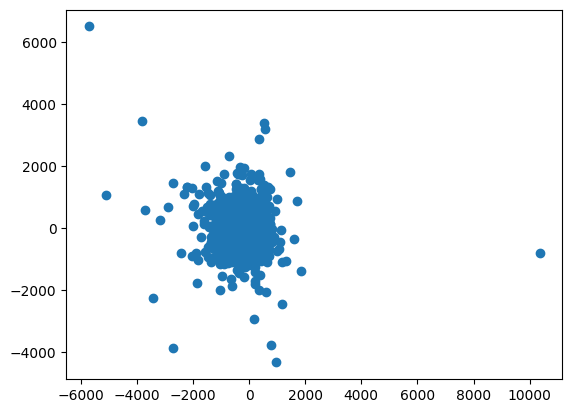

In [105]:
plt.scatter(pm_dec_array, pm_ra_cosdec_array)

In [93]:
len(r_valid)

4290

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7820\973465771.py:4: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,200)


(3.8767369579613877, 200)

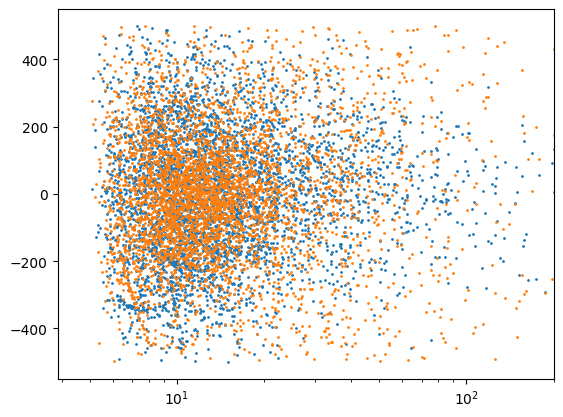

In [114]:
plt.scatter(r[mask_keep ] ,V_r[mask_keep] ,s=1)
plt.scatter(r[mask_keep ] ,V_theta[mask_keep] ,s=1)
plt.xscale('log')
plt.xlim(0,200)

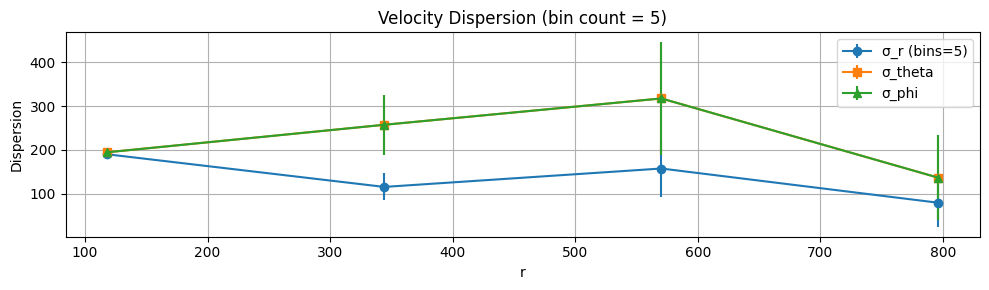

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7820\1171247139.py:95: RuntimeWarning: Mean of empty slice
  vals_avg = np.nanmean(vals_interp, axis=0)


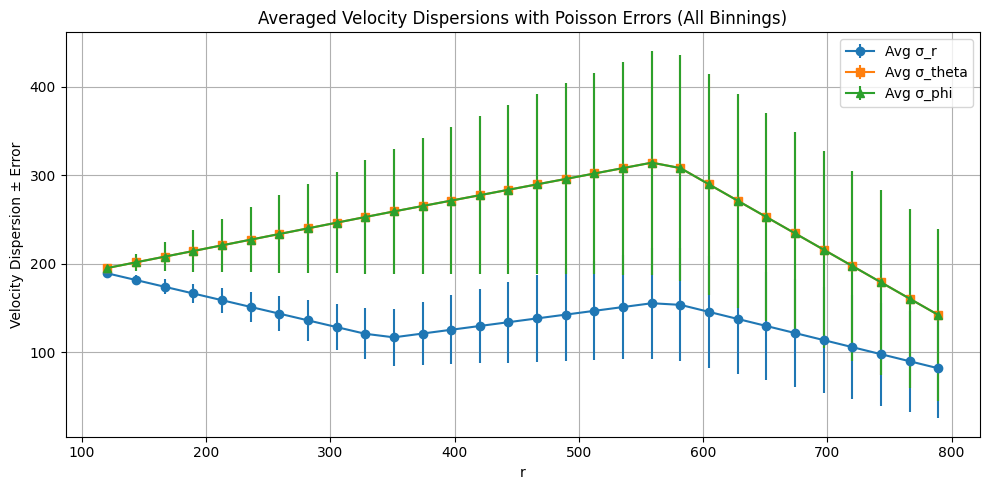

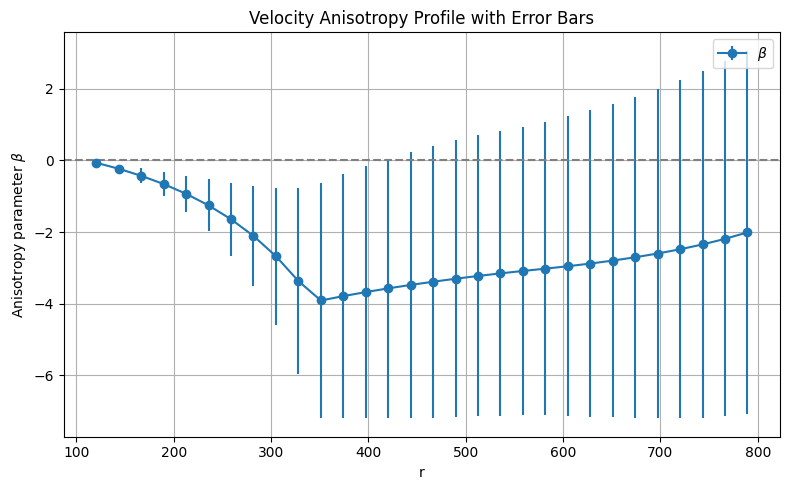

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7820\894393677.py:159: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  axes[1, 1].set(xlabel='r [kpc]', ylabel='$\\beta$',


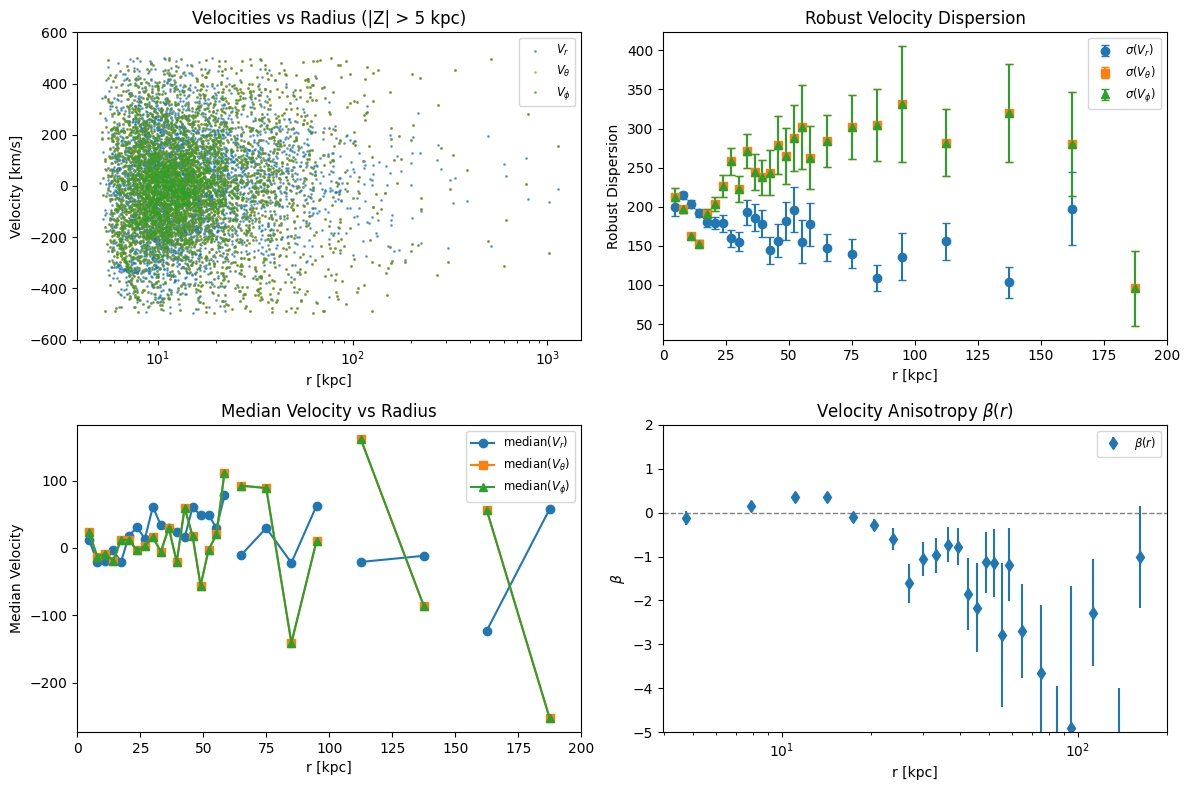

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import sigma_clip


r_spatial = r[mask_keep]
V_r_spatial = V_r[mask_keep]
V_th_spatial = V_theta[mask_keep]
V_ph_spatial = V_theta[mask_keep]

# clip_Vr = sigma_clip(V_r_spatial, sigma=300, maxiters=10)
# clip_Vt = sigma_clip(V_th_spatial, sigma=300, maxiters=10)
# clip_Vp = sigma_clip(V_ph_spatial, sigma=300, maxiters=10)

# combined_mask1 = ~(clip_Vr.mask | clip_Vt.mask | clip_Vp.mask)


r_valid     = r_spatial
V_r_valid   = V_r_spatial
V_th_valid  = V_th_spatial
V_ph_valid  = V_ph_spatial

# Step 5b: Remove any remaining NaNs
mask_finite = (
    np.isfinite(r_valid) &
    np.isfinite(V_r_valid) &
    np.isfinite(V_th_valid) &
    np.isfinite(V_ph_valid)
)
r_valid     = r_valid[mask_finite]
V_r_valid   = V_r_valid[mask_finite]
V_th_valid  = V_th_valid[mask_finite]
V_ph_valid  = V_ph_valid[mask_finite]

# ----------------------------------------
# 5. Define robust dispersion estimator
# ----------------------------------------
def robust_sigma(data, zero=False):
    y = np.array(data, dtype=float).ravel()
    if y.size == 0:
        return np.nan
    y0 = 0.0 if zero else np.median(y)
    dy = y - y0
    mad = np.median(np.abs(dy)) / 0.6745
    if mad < 1e-20:
        mad = np.mean(np.abs(dy)) / 0.80
        if mad < 1e-20:
            return 0.0
    u = dy / (6.0 * mad)
    mask_u = np.abs(u) <= 1.0
    if mask_u.sum() < 3:
        return np.nan
    u2 = u[mask_u]**2
    y_core = y[mask_u]
    numerator = np.sum((y_core - y0)**2 * (1 - u2)**4)
    den1 = np.sum((1 - u2) * (1 - 5.0 * u2))
    n = y.size
    sigma2 = n * numerator / (den1 * (den1 - 1))
    return np.sqrt(sigma2) if sigma2 > 0 else 0.0

# ----------------------------------------
# 6. Bin the radial data
# ----------------------------------------
bin_edges = np.concatenate([
    np.linspace(0, 60, 20),
    np.linspace(60, 100, 5),
    np.linspace(100, 150, 3),
    np.linspace(150, 200, 3)
])
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Initialize arrays
n_bins = len(bin_centers)
median_Vr = np.full(n_bins, np.nan)
median_Vt = np.full(n_bins, np.nan)
median_Vp = np.full(n_bins, np.nan)
sigma_Vr  = np.full(n_bins, np.nan)
sigma_Vt  = np.full(n_bins, np.nan)
sigma_Vp  = np.full(n_bins, np.nan)
error_Vr  = np.full(n_bins, np.nan)
error_Vt  = np.full(n_bins, np.nan)
error_Vp  = np.full(n_bins, np.nan)

# Compute statistics per bin
for i in range(n_bins):
    in_bin = (r_valid >= bin_edges[i]) & (r_valid < bin_edges[i+1])
    N = in_bin.sum()
    if N < 1:
        continue
    Vr_bin = V_r_valid[in_bin]
    Vt_bin = V_th_valid[in_bin]
    Vp_bin = V_ph_valid[in_bin]
    median_Vr[i] = np.median(Vr_bin)
    median_Vt[i] = np.median(Vt_bin)
    median_Vp[i] = np.median(Vp_bin)
    if N >= 3:
        sigma_Vr[i] = robust_sigma(Vr_bin)
        sigma_Vt[i] = robust_sigma(Vt_bin)
        sigma_Vp[i] = robust_sigma(Vp_bin)
        error_Vr[i] = sigma_Vr[i] / np.sqrt(2 * (N - 1))
        error_Vt[i] = sigma_Vt[i] / np.sqrt(2 * (N - 1))
        error_Vp[i] = sigma_Vp[i] / np.sqrt(2 * (N - 1))

# ----------------------------------------
# 7. Compute anisotropy parameter Beta and its error
# ----------------------------------------
beta = np.full(n_bins, np.nan)
beta_err = np.full(n_bins, np.nan)
valid = (sigma_Vr > 0) & (sigma_Vt >= 0) & (sigma_Vp >= 0)
for i in range(n_bins):
    if valid[i]:
        sr, st, sp = sigma_Vr[i], sigma_Vt[i], sigma_Vp[i]
        dsr, dst, dsp = error_Vr[i], error_Vt[i], error_Vp[i]
        beta[i] = 1 - (st**2 + sp**2) / (2 * sr**2)
        d_beta_dsr = (st**2 + sp**2) / (sr**3)
        d_beta_dst = -st / (sr**2)
        d_beta_dsp = -sp / (sr**2)
        beta_err[i] = np.sqrt(
            (d_beta_dsr * dsr)**2 +
            (d_beta_dst * dst)**2 +
            (d_beta_dsp * dsp)**2
        )

# ----------------------------------------
# 8. Plot all results in a 2x2 grid
# ----------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(12,8))
plt.subplots_adjust(wspace=0.0, hspace=0.0)

# (1) Scatter: Velocities vs Radius
axes[0, 0].scatter(r_valid, V_r_valid, s=1, alpha=0.6, label='$V_r$')
axes[0, 0].scatter(r_valid, V_th_valid, s=1, alpha=0.6, label='$V_\\theta$')
axes[0, 0].scatter(r_valid, V_ph_valid, s=1, alpha=0.6, label='$V_\\phi$')
axes[0, 0].set(xlabel='r [kpc]', ylabel='Velocity [km/s]',
               ylim=(-600,600), xscale=('log'),
               title='Velocities vs Radius (|Z| > 5 kpc)')
axes[0, 0].legend(fontsize='small')

# (2) Robust dispersions
axes[0, 1].errorbar(bin_centers, sigma_Vr, yerr=error_Vr, fmt='o', capsize=3, label='$\\sigma(V_r)$')
axes[0, 1].errorbar(bin_centers, sigma_Vt, yerr=error_Vt, fmt='s', capsize=3, label='$\\sigma(V_\\theta)$')
axes[0, 1].errorbar(bin_centers, sigma_Vp, yerr=error_Vp, fmt='^', capsize=3, label='$\\sigma(V_\\phi)$')
axes[0, 1].set(xlabel='r [kpc]', ylabel='Robust Dispersion',
               xlim=(0,200),
               title='Robust Velocity Dispersion')
axes[0, 1].legend(fontsize='small')

# (3) Median velocities
axes[1, 0].plot(bin_centers, median_Vr, marker='o', linestyle='-', label='$\\mathrm{median}(V_r)$')
axes[1, 0].plot(bin_centers, median_Vt, marker='s', linestyle='-', label='$\\mathrm{median}(V_\\theta)$')
axes[1, 0].plot(bin_centers, median_Vp, marker='^', linestyle='-', label='$\\mathrm{median}(V_\\phi)$')
axes[1, 0].set(xlabel='r [kpc]', ylabel='Median Velocity',
               xlim=(0, 200), title='Median Velocity vs Radius')
axes[1, 0].legend(fontsize='small')

# (4) Anisotropy Beta
axes[1, 1].errorbar(bin_centers, beta, yerr=beta_err, fmt='d', label='$\\beta(r)$')
axes[1, 1].axhline(0, color='gray', linestyle='--', lw=1)
axes[1, 1].set(xlabel='r [kpc]', ylabel='$\\beta$',
               xscale='log', xlim=(0,200), ylim=(-5,2),
               title='Velocity Anisotropy $\\beta(r)$')
axes[1, 1].legend(fontsize='small')

plt.tight_layout()
plt.show()


374.78883445481455

(-1.0, 1.0)

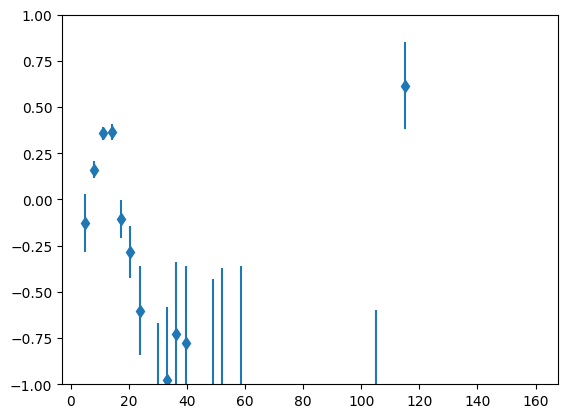

In [92]:
plt.errorbar(bin_centers, beta, yerr=beta_err, fmt='d', label='$\\beta(r)$')
plt.ylim(-1,1)
#plt.xscale('log')

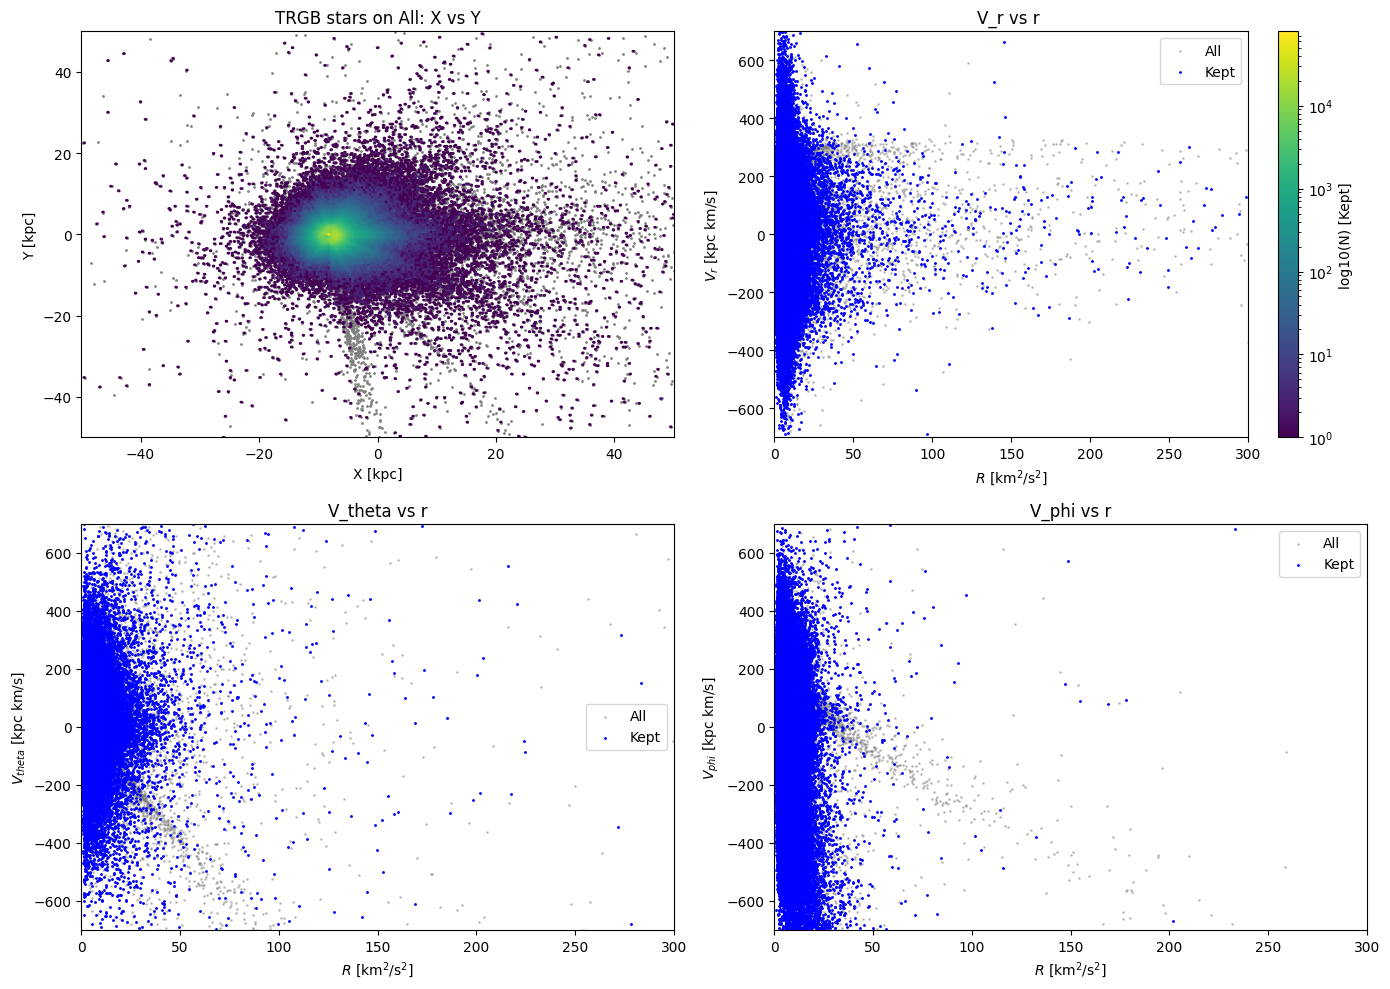

In [1]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, Galactocentric
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt

file_path=r"TRGB_Gaia_new-result.csv"
cep=pd.read_csv(file_path)
ra_array = np.array(cep['ra']) * u.degree
dec_array = np.array(cep['dec']) * u.degree
distance_array = (np.array(cep['parallax']) * u.mas).to(u.kpc, u.parallax())
pm_ra_cosdec_array = np.array(cep['pmra']) * u.mas / u.yr
pm_dec_array = np.array(cep['pmdec']) * u.mas / u.yr
radial_velocity_array = np.array(cep['radial_velocity']) * u.km / u.s
l=np.array(cep['l']) * u.degree
b=np.array(cep['b']) * u.degree 




'''cep=np.loadtxt('GC.txt')
ra_array = cep[1:, 2]* u.degree
dec_array =cep[1:, 3] * u.degree
distance_array = (cep[1:, 1] * u.mas).to(u.kpc, u.parallax())
pm_ra_cosdec_array = cep[1:, 5] * u.mas / u.yr
pm_dec_array = cep[1:, 6] * u.mas / u.yr
radial_velocity_array = cep[1:, 4] * u.km / u.s
l=cep[1:, 7] * u.degree
b=cep[1:, 8]* u.degree '''


# Constants
U_sun, V_sun, W_sun = 11.1* u.km / u.s, 12.24* u.km / u.s, 7.25* u.km / u.s  # Solar motion (km/s)
V0 = 229   * u.km / u.s  # Galactic rotation speed (km/s)
R0 = 8.1 * u.kpc

# Function to transform coordinates
def transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity,l,b):
    c = SkyCoord(ra=ra, dec=dec, distance=distance, pm_ra_cosdec=pm_ra_cosdec,
                 pm_dec=pm_dec, radial_velocity=radial_velocity)
    g = c.transform_to(Galactocentric(galcen_distance=8.1 * u.kpc,  # Default distance to Galactic Center
                                      z_sun=0.020 * u.kpc,  # Default Sun's height above the Galactic plane
                                      galcen_v_sun=[11.1,12.24, 7.25] * (u.km / u.s)))
    
    x, y, z = g.x.value, g.y.value, g.z.value
    vx, vy, vz = g.v_x.value, g.v_y.value, g.v_z.value
    d=distance
    # Cylindrical coordinates and velocities
    R = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    vc_R = (x * vx + y * vy) / R
    vc_phi = (-y * vx + x * vy) / R
    vc_z = vz  # same

# Spherical coordinates and velocities
    r = np.sqrt(x**2 + y**2 + z**2)
    theta_s = np.arccos(z / r)
    vs_r = (x * vx + y * vy + z * vz) / r
    vs_theta = (x * z * vx + y * z * vy - (x**2 + y**2) * vz) / (r * np.sqrt(x**2 + y**2))
    vs_phi = (-y * vx + x * vy) / np.sqrt(x**2 + y**2)
    r=np.sqrt(R0**2 + d**2 - 2 * R0 * d * np.cos(b) * np.cos(l))
    v_gsr=radial_velocity + U_sun * np.cos(b) * np.cos(l) + \
           V_sun * np.cos(b) * np.sin(l) + \
           W_sun * np.sin(b) + V0 * np.cos(b) * np.sin(l)
    

# Xue paper : 
    # Cartesian coordinates
    X, Y, Z = x, y, z
    U, V, W = vx, vy, vz  # Cartesian velocities


    r = np.sqrt(X**2 + Y**2 + Z**2)
    phi = np.arctan2(Y, X)
    theta = np.pi/2 - np.arctan2(Z, np.sqrt(X**2 + Y**2))

    # Spherical velocities
    V_r = (U * np.cos(phi) + V * np.sin(phi)) * np.sin(theta) + W * np.cos(theta)
    V_theta = (U * np.cos(phi) + V * np.sin(phi)) * np.cos(theta) - W * np.sin(theta)
    V_phi = U * np.sin(phi) - V * np.cos(phi)    

    v_c=(R/R0)*((v_gsr/(np.sin(l)*np.cos(b))+V0))
    

    return X,Y,Z,U,V,W,R, phi, z, vc_R, vc_phi, vc_z,vs_r,vs_theta,vs_phi, np.abs(z),r,v_gsr,v_c ,V_r,V_theta,V_phi
#plt.scatter((transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[0]),(transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3]),s=1)
# Run the transformation
X, Y, Z, U, V, W, R, phi, z, vc_R, vc_phi, vc_z, vs_r, vs_theta, vs_phi, abs_z, r, v_gsr, v_c, V_r, V_theta, V_phi = \
    transform_to_galactocentric(ra_array, dec_array, distance_array,
                                 pm_ra_cosdec_array, pm_dec_array, radial_velocity_array, l, b)

import matplotlib.pyplot as plt



# ---------------------------------------
# Step 1: Define the mask to remove stars
# Example: Remove stars with |Z| > 5 kpc
# ---------------------------------------
mask_remove =z<-3
mask_keep = ~mask_remove

# ---------------------------------------
# Step 2: Plotting
# ---------------------------------------
k = 50  # axis limits

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from galpy.potential import MWPotential2014, evaluatePotentials
import astropy.units as u

V_r = vs_r * u.km/u.s
V_theta = vs_theta * u.km/u.s
V_phi = vs_phi * u.km/u.s
Z = z * u.kpc
r_gc = r * u.kpc

V_tot2 = V_r**2 + V_theta**2 + V_phi**2
V_tan = np.sqrt(V_theta**2 + V_phi**2)
L = (r_gc * V_tan).to(u.kpc * u.km/u.s)

R_galpy = (r_gc / (8.0 * u.kpc)).decompose().value
Z_galpy = (Z / (1.0 * u.kpc)).decompose().value
phi = evaluatePotentials(MWPotential2014, R_galpy, Z_galpy) * u.km**2 / u.s**2
E = phi + 0.5 * V_tot2
fig, axs = plt.subplots(2, 2, figsize=(14, 10))



# ---- Upper Right: Hexbin of all (gray) + kept (color) ----
axs[0, 0].scatter(X,Y,color='gray',s=1,alpha=1)
hb_kept = axs[0, 0].hexbin(X[mask_keep], Y[mask_keep], gridsize=300, cmap='viridis', bins='log', extent=(-k, k, -k, k))
axs[0, 0].set_title("TRGB stars on All: X vs Y")
axs[0, 0].set_xlabel("X [kpc]")
axs[0, 0].set_ylabel("Y [kpc]")
axs[0, 0].set_xlim(-k, k)
axs[0, 0].set_ylim(-k, k)
fig.colorbar(hb_kept, ax=axs[0, 1], label='log10(N) [Kept]')
# 


# ---- Lower Right: Scatter of all (gray) + kept (blue) ----
axs[0, 1].scatter(r, V_r, s=1, color='gray', alpha=0.4, label='All')
axs[0, 1].scatter(r[mask_keep], V_r[mask_keep], s=1, color='blue', label='Kept')
axs[0, 1].set_title("V_r vs r ")
axs[0, 1].set_xlabel(r'$R$ [km$^2$/s$^2$]')
axs[0, 1].set_ylabel(r'$V_{r}$ [kpc km/s]')
axs[0, 1].set_xlim(0, 300)
axs[0, 1].set_ylim(-700, 700)
axs[0, 1].legend()

# --- Lower Left: E vs L plot ---
axs[1, 0].scatter(r ,V_theta, s=1, color='gray', alpha=0.4, label='All')
axs[1, 0].scatter(r[mask_keep], V_theta[mask_keep], s=1, color='blue', label='Kept')
axs[1, 0].set_xlabel(r'$R$ [km$^2$/s$^2$]')
axs[1, 0].set_ylabel(r'$V_{theta}$ [kpc km/s]')
axs[1, 0].set_title("V_theta vs r")
axs[1, 0].set_xlim(0,300)
axs[1, 0].set_ylim(-700,700)
axs[1, 0].legend()

# --- Lower Left: E vs L plot ---
axs[1, 1].scatter(r ,V_phi, s=1, color='gray', alpha=0.4, label='All')
axs[1, 1].scatter(r[mask_keep], V_phi[mask_keep], s=1, color='blue', label='Kept')
axs[1, 1].set_xlabel(r'$R$ [km$^2$/s$^2$]')
axs[1,1].set_ylabel(r'$V_{phi}$ [kpc km/s]')
axs[1, 1].set_title("V_phi vs r")
axs[1, 1].set_xlim(0,300)
axs[1, 1].set_ylim(-700,700)
axs[1, 1].legend()

plt.tight_layout()
plt.show()


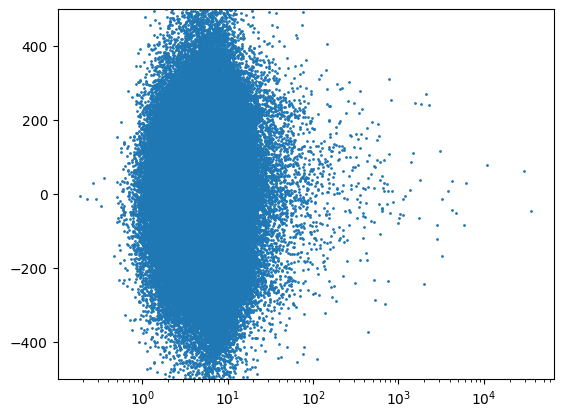

In [9]:
plt.scatter(r_valid,V_r_valid,s=1)
plt.ylim(-500,500)

plt.xscale('log')

c:\Users\Lenovo\AppData\Local\Programs\Python\Python38\lib\site-packages\astropy\stats\sigma_clipping.py:437: AstropyUserWarning: Input data contains invalid values (NaNs or infs), which were automatically clipped.
  warnings.warn(

c:\Users\Lenovo\AppData\Local\Programs\Python\Python38\lib\site-packages\astropy\stats\sigma_clipping.py:437: AstropyUserWarning: Input data contains invalid values (NaNs or infs), which were automatically clipped.
  warnings.warn(

c:\Users\Lenovo\AppData\Local\Programs\Python\Python38\lib\site-packages\astropy\stats\sigma_clipping.py:437: AstropyUserWarning: Input data contains invalid values (NaNs or infs), which were automatically clipped.
  warnings.warn(



IndexError: boolean index did not match indexed array along dimension 0; dimension is 2634866 but corresponding boolean dimension is 5074

array([-4.61729524])

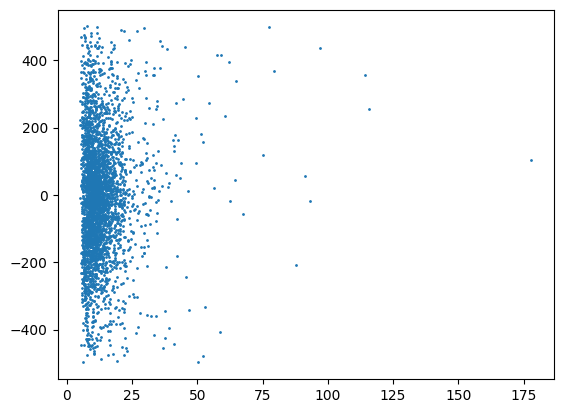

In [24]:
m =  (np.abs(V_r) <800) & (np.abs(V_theta) < 500) & (np.abs(V_phi) < 500)&(np.abs(z)>5)&(z>-5)
r_, vr, vt, vp = r[m], V_r[m], V_theta[m], V_phi[m]
plt.scatter(r[m],V_theta[m],s=1)

57.177877223219156

In [2]:
# plt.scatter(r[m],V_r[m],s=1)
# plt.xlim(0,200)
# plt.ylim(-500,500)
def robust_sigma(data):
    y = np.array(data, dtype=float).ravel()
    if y.size == 0:
        return np.nan
    y0 = np.median(y)
    mad = np.median(np.abs(y - y0)) / 0.6745
    if mad < 1e-20:
        mad = np.mean(np.abs(y - y0)) / 0.80
    u = (y - y0) / (6.0 * mad)
    mask_u = np.abs(u) <= 1.0
    if mask_u.sum() < 3:
        return np.nan
    u2 = u[mask_u]**2
    y_core = y[mask_u]
    num = np.sum((y_core - y0)**2 * (1 - u2)**4)
    den = np.sum((1 - u2) * (1 - 5.0 * u2))
    sigma2 = len(y) * num / (den * (den - 1))
    return np.sqrt(sigma2) if sigma2 > 0 else 0.0

# ----------------------------------------
# 7. Bin and compute statistics
# ----------------------------------------
bin_edges = np.linspace(0, 200, 40)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

def compute_binned_stats(r, v):
    stats = []
    for i in range(len(bin_centers)):
        mask = (r >= bin_edges[i]) & (r < bin_edges[i+1])
        if np.sum(mask) >= 3:
            v_bin = v[mask]
            sig = robust_sigma(v_bin)
            err = sig / np.sqrt(2 * (np.sum(mask) - 1))
            med = np.median(v_bin)
        else:
            sig = err = med = np.nan
        stats.append((med, sig, err))
    return np.array(stats).T
medVr, sigVr, errVr = compute_binned_stats(r[m], V_theta[m])
plt.errorbar(bin_centers,sigVr,errVr)


NameError: name 'r' is not defined

In [22]:
len(V_r_valid)

2554640

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21432\1305657520.py:153: RuntimeWarning: invalid value encountered in sqrt
  err = sig / np.sqrt(2 * (np.sum(mask) - 1))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Lenovo\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21432\1305657520.py:120: RuntimeWarning: invalid value encountered in divide
  u = (y - y0) / (6.0 * mad)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21432\1305657520.py:183: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  axes[0, 0].set(xlabel='r [kpc]', ylabel='Velocity [km/s]', xscale='log',ylim=(-600,600),xlim=(0,200))
C:\Users\Lenovo\AppData\Local\Temp\

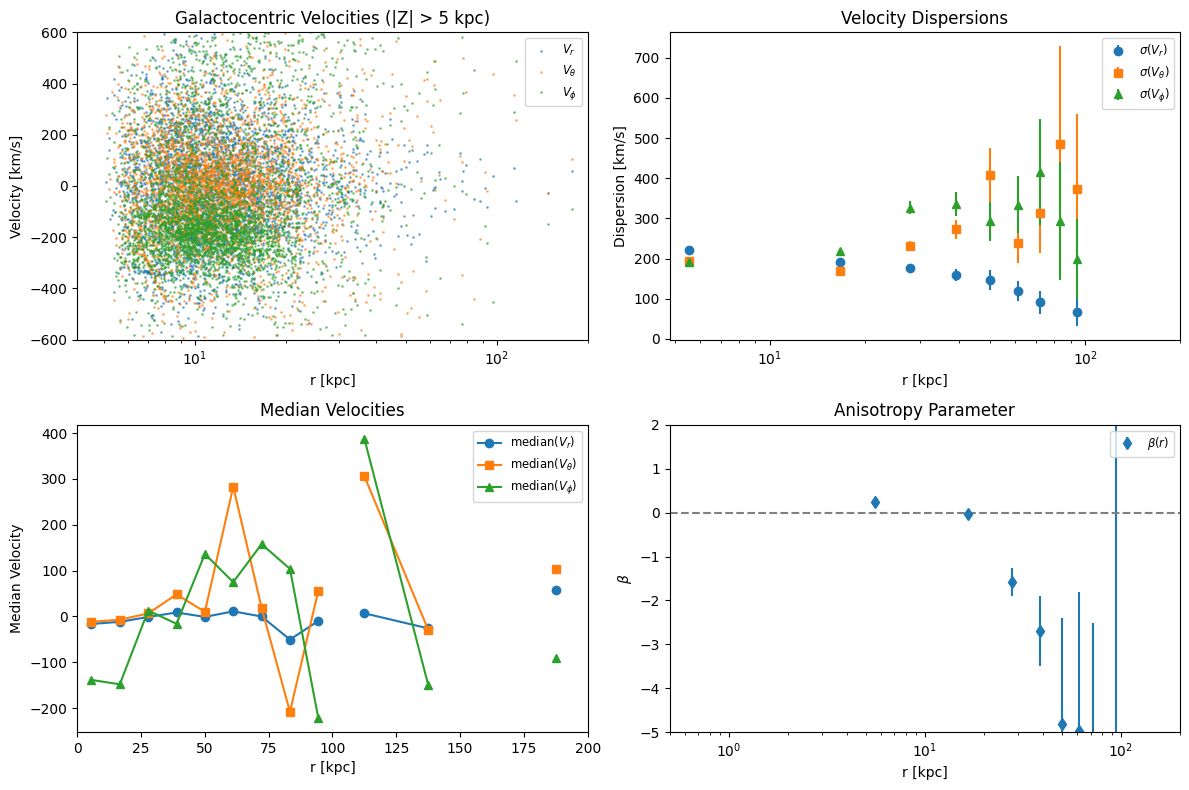

In [10]:
import numpy as np
import pandas as pd
import astropy.units as u
from astropy.coordinates import SkyCoord, Galactocentric
from astropy.stats import sigma_clip
import matplotlib.pyplot as plt
#%matplotlib auto
# ----------------------------------------
# 1. Load and clean the data
# ----------------------------------------
file_path = "TRGB_Gaia_new-result.csv"
cep = pd.read_csv(file_path)

required_cols = [
    'ra', 'dec', 'parallax', 'pmra', 'pmdec',
    'radial_velocity', 'l', 'b', 'parallax_error', 'bp_rp'
]
cep_clean = cep.dropna(subset=required_cols)
cep_clean = cep_clean[(cep_clean['bp_rp'] > 0) & (cep_clean['bp_rp'] >0)]

# ----------------------------------------
# 2. Convert to astropy quantities
# ----------------------------------------
ra = cep_clean['ra'].values * u.deg
dec = cep_clean['dec'].values * u.deg
distance = (cep_clean['parallax'].values * u.mas).to(u.kpc, u.parallax())
pm_ra_cosdec = cep_clean['pmra'].values * u.mas / u.yr
pm_dec = cep_clean['pmdec'].values * u.mas / u.yr
rv = cep_clean['radial_velocity'].values * u.km / u.s
l = cep_clean['l'].values * u.deg
b = cep_clean['b'].values * u.deg
# ----------------------------------------
# 3. Constants for Galactocentric frame
# ----------------------------------------
U_sun, V_sun, W_sun = 11.1, 12.24, 7.25
R0 = 8.3 * u.kpc
z_sun = 0.029 * u.kpc
V0=229
# ----------------------------------------
# 4. Transformation
# ----------------------------------------
def transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, rv):
    icrs = SkyCoord(ra=ra, dec=dec, distance=distance,
                    pm_ra_cosdec=pm_ra_cosdec, pm_dec=pm_dec,
                    radial_velocity=rv)
    galcen = icrs.transform_to(
        Galactocentric(galcen_distance=R0, z_sun=z_sun,
                       galcen_v_sun=[U_sun, V_sun, W_sun] * u.km/u.s)
    )
    X, Y, Z = galcen.x.value, galcen.y.value, galcen.z.value
    U, V, W = galcen.v_x.value, galcen.v_y.value, galcen.v_z.value
    r = np.sqrt(X**2 + Y**2 + Z**2)
    phi = np.arctan2(Y, X)
    theta = np.pi / 2 - np.arctan2(Z, np.sqrt(X**2 + Y**2))
    V_r = (U * np.cos(phi) + V * np.sin(phi)) * np.sin(theta) + W * np.cos(theta)
    V_theta = (U * np.cos(phi) + V * np.sin(phi)) * np.cos(theta) - W * np.sin(theta)
    V_phi = U * np.sin(phi) - V * np.cos(phi)
    return r, Z, V_r, V_theta, V_phi,X,Y

r, z, V_r, V_theta, V_phi,X,Y = transform_to_galactocentric(
    ra, dec, distance, pm_ra_cosdec, pm_dec, rv
)

# ----------------------------------------
# 5. Spatial and sigma clipping
# ----------------------------------------
spatial_mask = (np.abs(z)>5)&~(z<-3) & (np.abs(V_r)<600)& (np.abs(V_theta)<600)& (np.abs(V_phi)<600)
r_valid = r[spatial_mask]
V_r_valid = V_r[spatial_mask]
V_th_valid = V_theta[spatial_mask]
V_ph_valid = V_phi[spatial_mask]
rv_valid = rv[spatial_mask].value
l_valid = l[spatial_mask]
b_valid = b[spatial_mask]


# r_spatial = r[spatial_mask]
# V_r_spatial = V_r[spatial_mask]
# V_th_spatial = V_theta[spatial_mask]
# V_ph_spatial = V_phi[spatial_mask]
# rv_spatial = rv[spatial_mask].value
# l_spatial = l[spatial_mask]
# b_spatial = b[spatial_mask]

# clip_Vr = sigma_clip(V_r_spatial, sigma=100000, maxiters=100)
# clip_Vt = sigma_clip(V_th_spatial, sigma=100000, maxiters=100)
# clip_Vp = sigma_clip(V_ph_spatial, sigma=100000, maxiters=100)

# distance_valid = distance[spatial_mask]
# combined_mask = ~(clip_Vr.mask | clip_Vt.mask | clip_Vp.mask) 

# r_valid = r_spatial[combined_mask]
# V_r_valid = V_r_spatial[combined_mask]
# V_th_valid = V_th_spatial[combined_mask]
# V_ph_valid = V_ph_spatial[combined_mask]

# rv_valid = rv_spatial[combined_mask]
# l_valid = l_spatial[combined_mask]
# b_valid = b_spatial[combined_mask]
# distance_valid = distance[spatial_mask]

    # 5. Compute V_gsr and V_circ
v_gsr = (rv_valid
             + U_sun * np.cos(b_valid) * np.cos(l_valid)
             + V_sun * np.cos(b_valid) * np.sin(l_valid)
             + W_sun * np.sin(b_valid)
             + V0 * np.cos(b_valid) * np.sin(l_valid))

# ----------------------------------------
# 6. Robust dispersion estimator
# ----------------------------------------
def robust_sigma(data):
    y = np.array(data, dtype=float).ravel()
    if y.size == 0:
        return np.nan
    y0 = np.median(y)
    mad = np.median(np.abs(y - y0)) / 0.6745
    if mad < 1e-20:
        mad = np.mean(np.abs(y - y0)) / 0.80
    u = (y - y0) / (6.0 * mad)
    mask_u = np.abs(u) <= 1.0
    if mask_u.sum() < 3:
        return np.nan
    u2 = u[mask_u]**2
    y_core = y[mask_u]
    num = np.sum((y_core - y0)**2 * (1 - u2)**4)
    den = np.sum((1 - u2) * (1 - 5.0 * u2))
    sigma2 = len(y) * num / (den * (den - 1))
    return np.sqrt(sigma2) if sigma2 > 0 else 0.0

# ----------------------------------------
# 7. Bin and compute statistics
# -----------------------------------A-----


bin_edges = bins=np.concatenate([
            np.linspace(0, 100, 10),
    np.linspace(100, 200, 5),
            # np.linspace(100, 150, 10)[1:], np.linspace(150, 200, 10)[1:],
            # np.linspace(200, 400, 10)[1:], np.linspace(400, 600, 8)[1:],
            # np.linspace(600, 800, 5)[1:], np.linspace(800, 1000, 3)[1:],
            # np.linspace(1000, 1200, 2)[1:]
        ])
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

def compute_binned_stats(r, v):
    stats = []
    for i in range(len(bin_centers)):
        mask = (r >= bin_edges[i]) & (r < bin_edges[i+1])
        if np.sum(mask) >= 0:
            v_bin = v[mask]
            sig = robust_sigma(v_bin)
            err = sig / np.sqrt(2 * (np.sum(mask) - 1))
            med = np.median(v_bin)
        else:
            sig = err = med = np.nan
        stats.append((med, sig, err))
    return np.array(stats).T

medVr, sigVr, errVr = compute_binned_stats(r_valid, V_r_valid)
medVt, sigVt, errVt = compute_binned_stats(r_valid, V_th_valid)
medVp, sigVp, errVp = compute_binned_stats(r_valid, V_ph_valid)
medVgsr, sigVgsr, errVgsr=compute_binned_stats(r_valid, v_gsr)
# Anisotropy
beta = 1 - (sigVt**2 + sigVp**2) / (2 * sigVr**2)
d_beta_dsr = (sigVt**2 + sigVp**2) / (sigVr**3)
d_beta_dst = -sigVt / (sigVr**2)
d_beta_dsp = -sigVp / (sigVr**2)
beta_err = np.sqrt((d_beta_dsr * errVr)**2 +
                   (d_beta_dst * errVt)**2 +
                   (d_beta_dsp * errVp)**2)

# ----------------------------------------
# 8. Plot results
# ----------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Scatter plot of velocities
axes[0, 0].scatter(r_valid, V_r_valid, s=1, alpha=0.5, label='$V_r$')
axes[0, 0].scatter(r_valid, V_th_valid, s=1, alpha=0.5, label='$V_\\theta$')
axes[0, 0].scatter(r_valid, V_ph_valid, s=1, alpha=0.5, label='$V_\\phi$')
axes[0, 0].set(xlabel='r [kpc]', ylabel='Velocity [km/s]', xscale='log',ylim=(-600,600),xlim=(0,200))
axes[0, 0].legend(fontsize='small')
axes[0, 0].set_title("Galactocentric Velocities (|Z| > 5 kpc)")

# Robust dispersions
axes[0, 1].errorbar(bin_centers, sigVr, yerr=errVr, fmt='o', label='$\\sigma(V_r)$')
axes[0, 1].errorbar(bin_centers, sigVt, yerr=errVt, fmt='s', label='$\\sigma(V_\\theta)$')
axes[0, 1].errorbar(bin_centers, sigVp, yerr=errVp, fmt='^', label='$\\sigma(V_\\phi)$')
axes[0, 1].set(xlabel='r [kpc]', ylabel='Dispersion [km/s]', xscale=('log'),xlim=(0, 200))
axes[0, 1].legend(fontsize='small')
axes[0, 1].set_title("Velocity Dispersions")

# Medians
axes[1, 0].plot(bin_centers, medVr, 'o-', label='$\\mathrm{median}(V_r)$')
axes[1, 0].plot(bin_centers, medVt, 's-', label='$\\mathrm{median}(V_\\theta)$')
axes[1, 0].plot(bin_centers, medVp, '^-', label='$\\mathrm{median}(V_\\phi)$')
axes[1, 0].set(xlabel='r [kpc]', ylabel='Median Velocity', xlim=(0, 200))
axes[1, 0].legend(fontsize='small')
axes[1, 0].set_title("Median Velocities")

# Beta
axes[1, 1].errorbar(bin_centers, beta, yerr=beta_err, fmt='d', label='$\\beta(r)$')
axes[1, 1].axhline(0, color='gray', linestyle='--')
axes[1, 1].set(xlabel='r [kpc]', ylabel='$\\beta$', xscale='log', xlim=(0.5, 200), ylim=(-5, 2))
axes[1, 1].legend(fontsize='small')
axes[1, 1].set_title("Anisotropy Parameter")

plt.tight_layout()
plt.show()


In [7]:
beta

array([   0.83441396,    0.91085014,   -4.30125707,   -8.50004625,
        -14.80734057,  -17.61386061,  -24.48613531,  -53.62057563,
        -43.1379044 ,           nan,  -95.25137876, -128.77508517,
       -123.51685169, -232.56029126])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21432\3340407813.py:8: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  axes[0, 1].set(xlabel='r [kpc]', ylabel='Dispersion [km/s]', xscale=('log'),xlim=(0, 200))


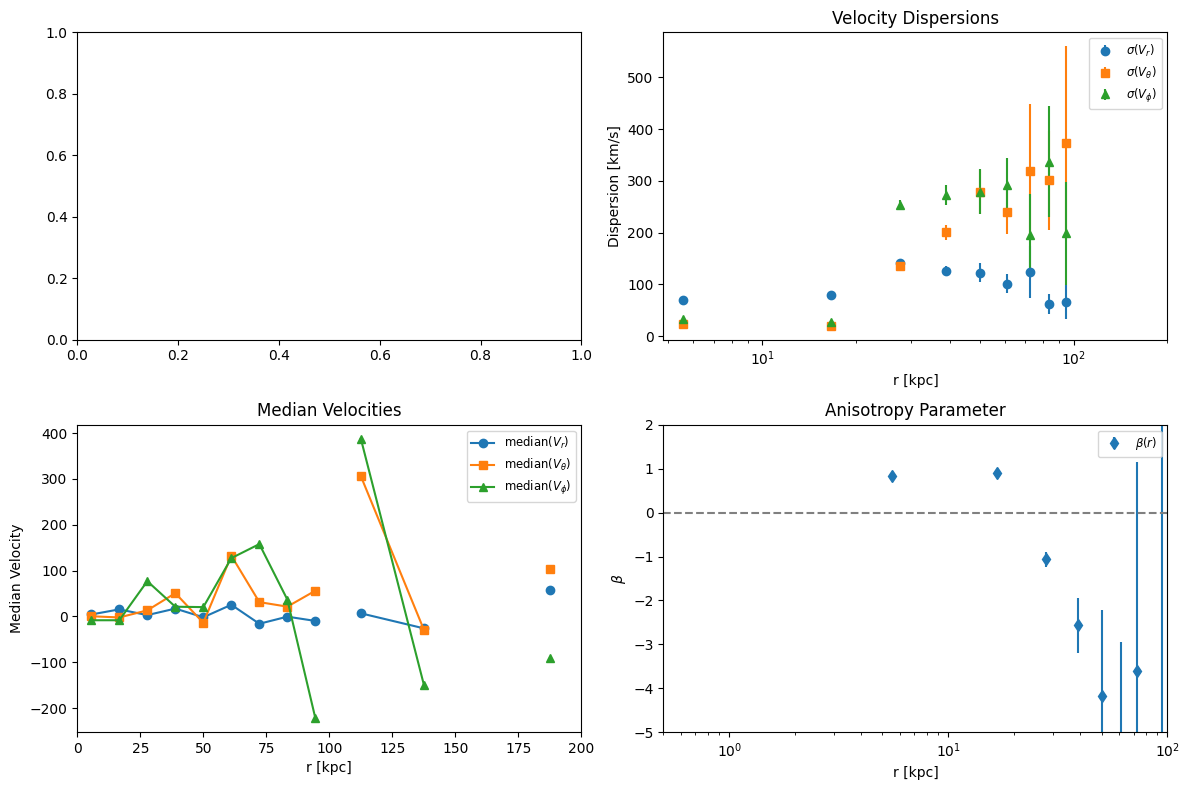

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Robust dispersions
axes[0, 1].errorbar(bin_centers, sigVr, yerr=errVr, fmt='o', label='$\\sigma(V_r)$')
axes[0, 1].errorbar(bin_centers, sigVt, yerr=errVt, fmt='s', label='$\\sigma(V_\\theta)$')
axes[0, 1].errorbar(bin_centers, sigVp, yerr=errVp, fmt='^', label='$\\sigma(V_\\phi)$')
axes[0, 1].set(xlabel='r [kpc]', ylabel='Dispersion [km/s]', xscale=('log'),xlim=(0, 200))
axes[0, 1].legend(fontsize='small')
axes[0, 1].set_title("Velocity Dispersions")

# Medians
axes[1, 0].plot(bin_centers, medVr, 'o-', label='$\\mathrm{median}(V_r)$')
axes[1, 0].plot(bin_centers, medVt, 's-', label='$\\mathrm{median}(V_\\theta)$')
axes[1, 0].plot(bin_centers, medVp, '^-', label='$\\mathrm{median}(V_\\phi)$')
axes[1, 0].set(xlabel='r [kpc]', ylabel='Median Velocity', xlim=(0, 200))
axes[1, 0].legend(fontsize='small')
axes[1, 0].set_title("Median Velocities")

# Beta
axes[1, 1].errorbar(bin_centers, beta, yerr=beta_err, fmt='d', label='$\\beta(r)$')
axes[1, 1].axhline(0, color='gray', linestyle='--')
axes[1, 1].set(xlabel='r [kpc]', ylabel='$\\beta$', xscale='log', xlim=(0.5, 100), ylim=(-5, 2))
axes[1, 1].legend(fontsize='small')
axes[1, 1].set_title("Anisotropy Parameter")

plt.tight_layout()
plt.show()

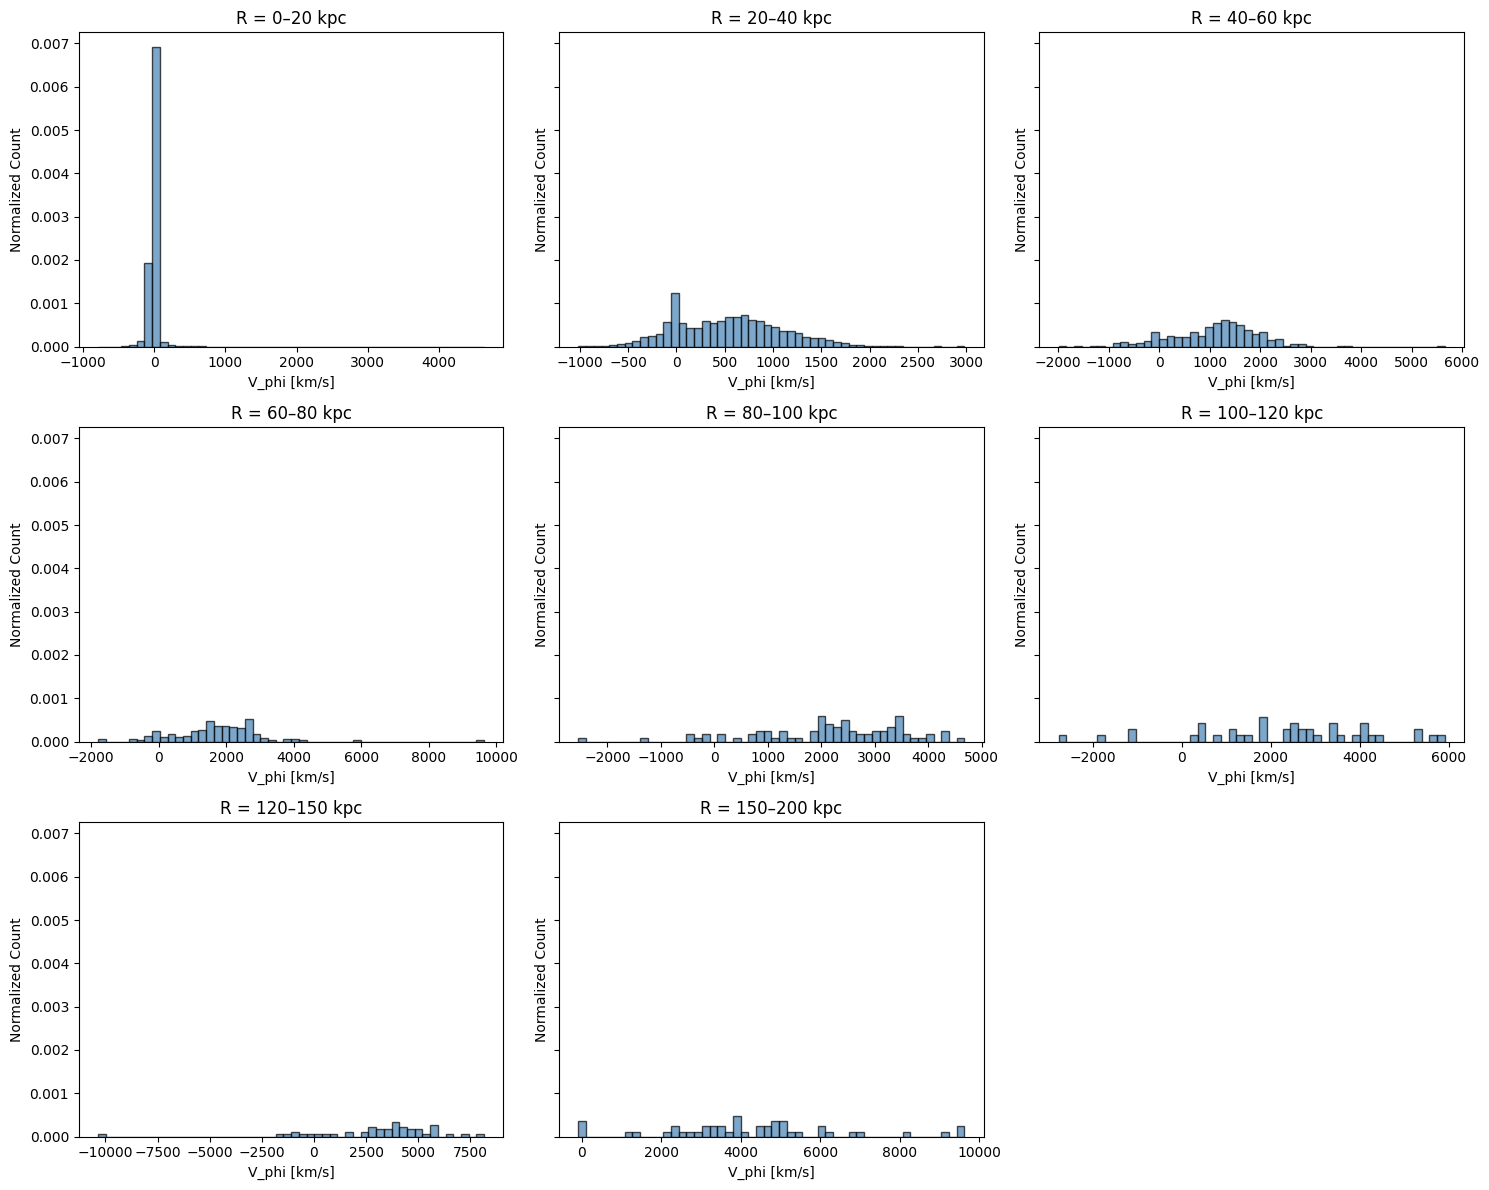

In [146]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Define r bins (you can modify these)
r_bins = [0, 20, 40, 60, 80, 100, 120, 150, 200]  # in kpc

n_bins = len(r_bins) - 1
ncols = 3
nrows = int(np.ceil(n_bins / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 4 * nrows), sharey=True)
axes = axes.flatten()

for i in range(n_bins):
    rmin, rmax = r_bins[i], r_bins[i+1]
    
    # Select stars in this radial bin
    mask = (r_valid >= rmin) & (r_valid < rmax)
    vphi_bin = V_ph_valid[mask]
    
    if len(vphi_bin) < 10:
        axes[i].text(0.5, 0.5, f'Not enough data\n{rmin}–{rmax} kpc',
                     transform=axes[i].transAxes, ha='center', va='center')
        axes[i].set_title(f'{rmin}–{rmax} kpc')
        continue
    
    # Plot normalized histogram
    axes[i].hist(vphi_bin, bins=50, density=True, color='steelblue', alpha=0.7, edgecolor='black')
    
    axes[i].set_title(f'R = {rmin}–{rmax} kpc')
    axes[i].set_xlabel('V_phi [km/s]')
    axes[i].set_ylabel('Normalized Count')

# Remove any unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


(0.0, 200.0)

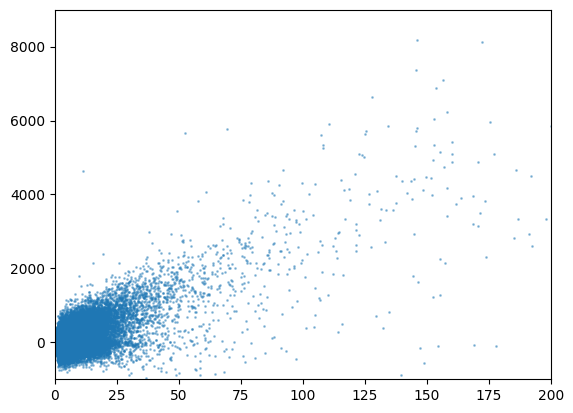

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# --- Manual mean and sigma parameters for each r bin
manual_sigma_params = {
    (0, 20): (1000, 100),
    (20, 40): (1000, 120),
    (40, 60): (2000, 150),
    (60, 80): (3020, 100),
    (80, 100): (4000, 100),
}

filtered_Vphi = []
filtered_r = []

for (rmin, rmax), (mean, sigma) in manual_sigma_params.items():
    # Select radial bin
    mask_r = (r_valid >= rmin) & (r_valid < rmax)
    r_bin = r_valid[mask_r]
    vphi_bin = V_ph_valid[mask_r]

    # Compute Gaussian likelihoods
    gaussian_likelihood = np.exp(-0.5 * ((vphi_bin - mean) / sigma)**2)
    
    # Normalize to max of 1 (optional)
    gaussian_likelihood /= gaussian_likelihood.max()

    # Keep values with likelihood > threshold (e.g., keep ~99.7% by using exp(-0.5*(3)^2) ≈ 0.011)
    prob_threshold = np.exp(-0.5 * (3)**2)  # ~0.011
    keep_mask = gaussian_likelihood > prob_threshold

    filtered_Vphi.append(vphi_bin[keep_mask])
    filtered_r.append(r_bin[keep_mask])

# Combine cleaned bins
V_ph_filtered = np.concatenate(filtered_Vphi)
r_filtered = np.concatenate(filtered_r)

# ----------------------------
# Plot: Filtered Data
# ----------------------------
plt.figure(figsize=(10, 6))
plt.scatter(r_filtered, V_ph_filtered, s=2, alpha=0.4, label='Gaussian-Clipped',color='red')
plt.xlabel('R [kpc]')
plt.ylabel('V_phi [km/s]')
plt.title('V_phi vs R after Gaussian-Likelihood Clipping')

plt.scatter(r_valid,V_ph_valid,s=1,alpha=0.4)
plt.ylim(-1000,9000)
plt.xlim(0,200)
plt.legend()
plt.show()



Using matplotlib backend: TkAgg


c:\Users\Lenovo\AppData\Local\Programs\Python\Python38\lib\site-packages\astropy\stats\sigma_clipping.py:437: AstropyUserWarning: Input data contains invalid values (NaNs or infs), which were automatically clipped.
  warnings.warn(

Sigma-clipped stats:
Mean = -9.84, Median = -8.18, Stddev = 67.29


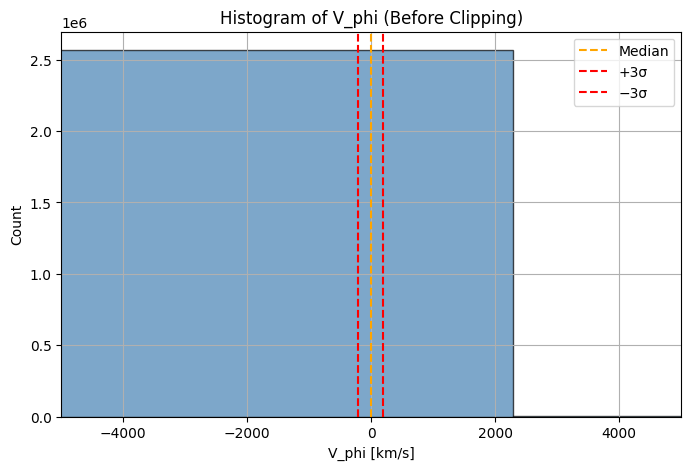

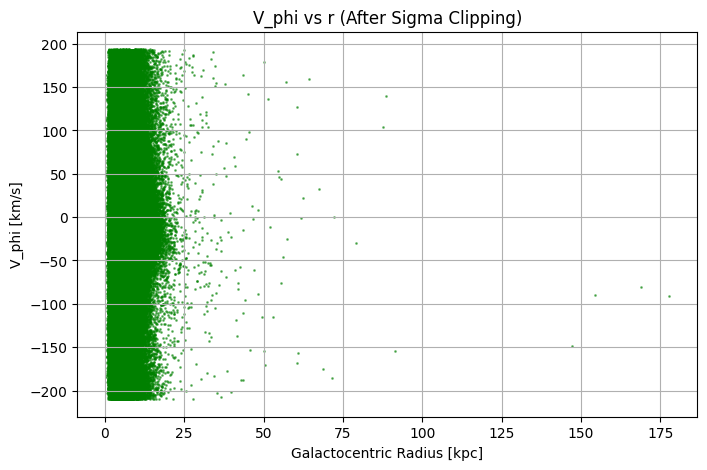

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import sigma_clipped_stats

# Step 1: Compute clipped stats
mean, median, stddev = sigma_clipped_stats(V_ph_valid, sigma=50.0, maxiters=100)

print(f"Sigma-clipped stats:\nMean = {mean:.2f}, Median = {median:.2f}, Stddev = {stddev:.2f}")

# Step 2: Plot histogram with clipped range
plt.figure(figsize=(8, 5))
plt.hist(V_phi, bins=100, alpha=0.7, color='steelblue', edgecolor='black')
plt.xlim(-5000,5000)
plt.axvline(median, color='orange', label='Median', linestyle='--')
plt.axvline(median + 3*stddev, color='red', linestyle='--', label='+3σ')
plt.axvline(median - 3*stddev, color='red', linestyle='--', label='−3σ')
plt.title('Histogram of V_phi (Before Clipping)')
plt.xlabel('V_phi [km/s]')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

# Step 3: Apply sigma clipping on Y (V_phi) axis only
mask_clipped = (V_ph_valid > (median - 3*stddev)) & (V_ph_valid < (median + 3*stddev))

# Filtered data
V_ph_clipped = V_ph_valid[mask_clipped]
r_clipped = r_valid[mask_clipped]

# Step 4: Scatter plot after clipping
plt.figure(figsize=(8, 5))
plt.scatter(r_clipped, V_ph_clipped, s=1, alpha=0.5, color='green')
plt.title('V_phi vs r (After Sigma Clipping)')
plt.xlabel('Galactocentric Radius [kpc]')
plt.ylabel('V_phi [km/s]')
plt.grid(True)
plt.show()


<ErrorbarContainer object of 3 artists>

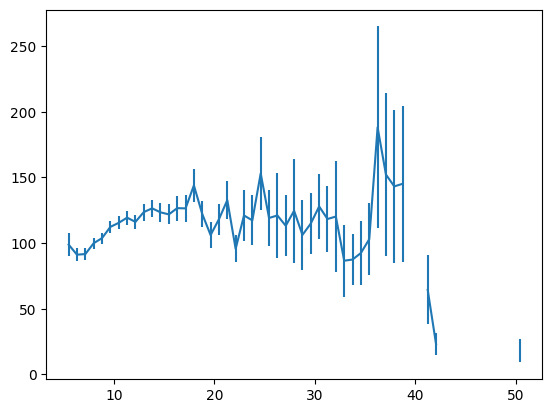

In [80]:
plt.errorbar(bin_centers ,sigVgsr,yerr= errVgsr)

In [89]:
medVr, sigVr, errVr

(array([-12.11783577,  -9.93939291,   3.97738174, -14.92474727,
         -0.95691035, -17.89069541,  -8.42935315, -39.23201274,
         29.26914073,  42.83452318,  -9.35611131,  99.68614487,
         39.22350539,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan]),
 array([212.77920149, 188.22643425, 184.5980474 , 155.49937845,
  

In [63]:
len(V_r[spatial_mask])

4178

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22812\3114460119.py:5: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,400)


(3.5729987537859875, 400)

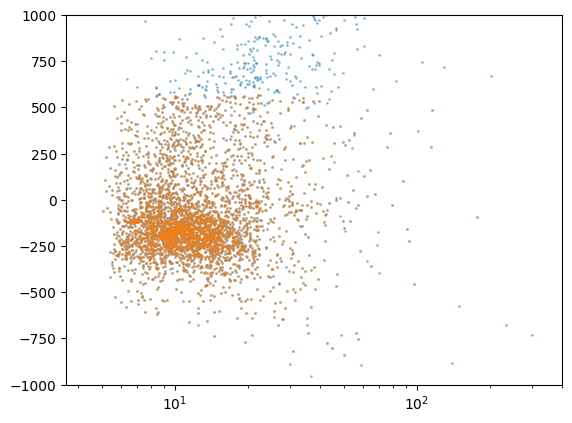

In [86]:
plt.scatter(r_spatial,V_ph_spatial,s=1,alpha=0.4)
plt.scatter(r_valid,V_ph_valid,s=1,alpha=0.4)
plt.ylim(-1000,1000)
plt.xscale('log')
plt.xlim(0,400)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic

# Example data
np.random.seed(42)  # For reproducibility
x = (transform_to_galactocentric(ra_array, dec_array, distance_array, pm_ra_cosdec_array, pm_dec_array, radial_velocity_array, l, b)[0])
y = (transform_to_galactocentric(ra_array, dec_array, distance_array, pm_ra_cosdec_array, pm_dec_array, radial_velocity_array, l, b)[8])

# Remove NaN values
valid = ~np.isnan(x) & ~np.isnan(y)
x_clean = x[valid]
y_clean = y[valid]

# Restrict data to x <= 200 kpc
valid_range = x_clean <= 1200
x_clean = x_clean[valid_range]
y_clean = y_clean[valid_range]

# Define custom bin edges for differential binning
custom_bin_edges = np.concatenate([
    np.linspace(8,100,18),  # 10 bins in range [min(x), 50]
    np.linspace(100,150, 10)[1:],
    np.linspace(150,200, 10)[1:], 
    np.linspace(200,400, 10)[1:], 
    np.linspace(400,600, 8)[1:], 
    np.linspace(600,800, 5)[1:], 
    np.linspace(800,1000, 3)[1:],  
    np.linspace(1000,1200, 2)[1:],                                                                                                                                    
      # 2 bins in range (150, max(x)]
])
bin_centers = 0.5 * (custom_bin_edges[:-1] + custom_bin_edges[1:])

# Compute statistics
mean_x, _, _ = binned_statistic(x_clean, x_clean, statistic='mean', bins=custom_bin_edges)
mean_y, _, _ = binned_statistic(x_clean, y_clean, statistic='mean', bins=custom_bin_edges)
std_y, _, _ = binned_statistic(x_clean, y_clean, statistic='std', bins=custom_bin_edges)
n_points, _, _ = binned_statistic(x_clean, y_clean, statistic='count', bins=custom_bin_edges)

# Create DataFrame
binned_data = pd.DataFrame({
    'Bin Center': bin_centers,
    'Mean X': mean_x,
    'Mean Y': mean_y,
    'Std Y': std_y,
    'Num Points': n_points
})

# Drop rows with NaN values (e.g., empty bins)
binned_data = binned_data.dropna()
binned_data_restricted = binned_data[binned_data['Bin Center'] <= 1200]
# Display DataFrame
print(binned_data_restricted)





# Plotting
plt.figure(figsize=(15, 6))
plt.scatter(x_clean, y_clean, s=1, label='Raw Data')
plt.errorbar(binned_data['Mean X'], binned_data['Mean Y'], 
             yerr=binned_data['Std Y'], fmt='o', label='Binned Data', 
             color='blue', capsize=3)
plt.xlim(0, 1200)
plt.xlabel('x (Binned)')
plt.ylabel('y (Mean ± Std)')
plt.title('Binned Scatter Plot with Standard Deviations (Differential Binning, x ≤ 200 kpc)')
plt.grid()
plt.legend()
plt.show()


In [30]:
import sys
!{sys.executable} -m pip install sklearn

Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'


    ERROR: Command errored out with exit status 1:
     command: 'c:\Users\Lenovo\AppData\Local\Programs\Python\Python38\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Lenovo\\AppData\\Local\\Temp\\pip-install-zjjf6tve\\sklearn_4563e807ec604b32a08d9c0e37d6a3c5\\setup.py'"'"'; __file__='"'"'C:\\Users\\Lenovo\\AppData\\Local\\Temp\\pip-install-zjjf6tve\\sklearn_4563e807ec604b32a08d9c0e37d6a3c5\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Lenovo\AppData\Local\Temp\pip-pip-egg-info-mwwswlda'
         cwd: C:\Users\Lenovo\AppData\Local\Temp\pip-install-zjjf6tve\sklearn_4563e807ec604b32a08d9c0e37d6a3c5\
    Complete output (15 lines):
    The 'sklearn' PyPI package is deprecated, use 'scikit-learn

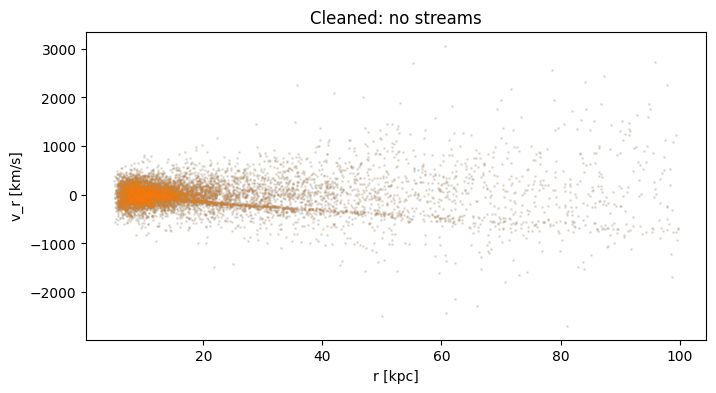

In [69]:
import numpy as np
from sklearn.cluster import DBSCAN

def remove_streams_dbscan(r, vr, vtheta, vphi,
                          eps=50.0,    # cluster radius in km/s-and-kpc units
                          min_samples=200):
    """
    Remove points belonging to small, dense clusters in (r,vr,vtheta,vphi) space.
    Returns mask of "background" points.
    """
    # stack into a 4D array
    X = np.vstack([r, vr, vtheta, vphi]).T

    # run DBSCAN — it will label core clusters 0,1,2…, and noise as -1
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    labels = db.labels_

    # count members per label
    uniq, counts = np.unique(labels, return_counts=True)
    label_counts = dict(zip(uniq, counts))

    # identify which clusters are big enough to keep as background
    # here we assume the *largest* cluster is your true background
    # everything else (small clusters) are streams
    bg_label = max(label_counts, key=lambda lab: label_counts[lab])

    # mask is True for background (only keep label == bg_label or noise == -1)
    mask = (labels == bg_label) | (labels == -3)
    return mask

def remove_streams_sigma_clip(r, v, bins=500, sigma=30.0):
    """
    Sigma-clip a single velocity component v in radial bins.
    Returns a boolean mask of points to keep.
    """
    mask = np.ones_like(v, dtype=bool)
    edges = np.linspace(r.min(), r.max(), bins+1)
    for i in range(bins):
        sel = (r >= edges[i]) & (r < edges[i+1])
        if sel.sum() < 10:
            continue
        med = np.median(v[sel])
        std = np.std(v[sel])
        mask[sel] &= np.abs(v[sel] - med) < sigma * std
    return mask

# --- usage example ---
# suppose you’ve already loaded your arrays r, vr, vtheta, vphi

# 1) DBSCAN approach
bg_mask_db = remove_streams_dbscan(r_valid, V_r_valid,V_th_valid,V_ph_valid,
                                   eps=50.0,    # tweak to the typical stream thickness
                                   min_samples=200)

# 2) Sigma‐clip approach (on each component)
mask_rv   = remove_streams_sigma_clip(r_valid, V_th_valid,   bins=100, sigma=3.5)
# mask_th   = remove_streams_sigma_clip(r, vtheta, bins=100, sigma=3.5)
# mask_phi  = remove_streams_sigma_clip(r, vphi,   bins=100, sigma=3.5)
bg_mask_sc = mask_rv 
# & mask_th & mask_phi

# pick whichever mask you trust more
final_mask = bg_mask_db # or bg_mask_sc

# now plot only the background:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.scatter(r_valid ,V_th_valid,s=1,alpha=0.1)
plt.scatter(r_valid[final_mask], V_th_valid[final_mask], s=1, alpha=0.1)
plt.xlabel("r [kpc]"); plt.ylabel("v_r [km/s]")
plt.title("Cleaned: no streams")
plt.show()


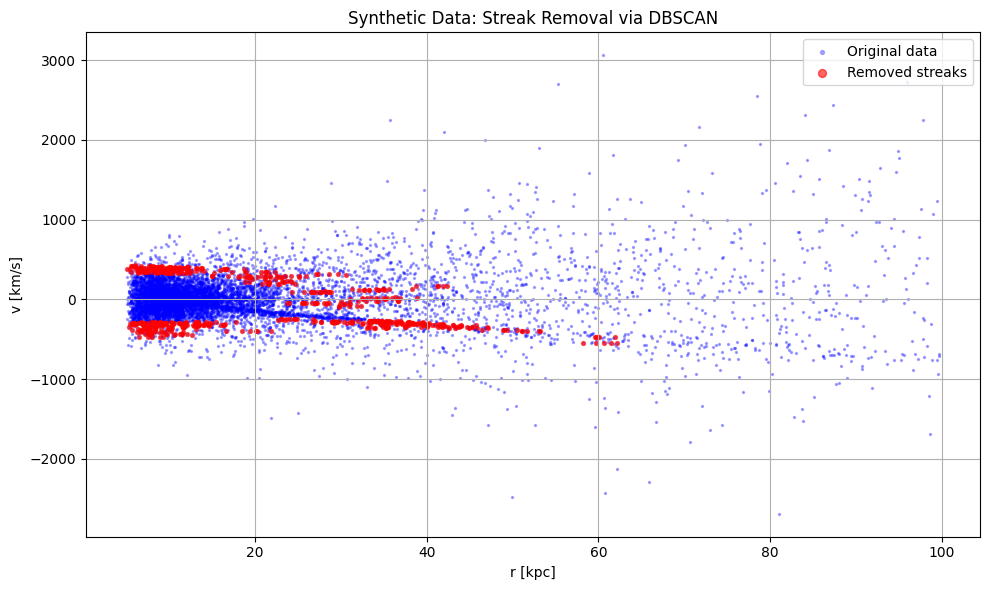

<function matplotlib.pyplot.show(close=None, block=None)>

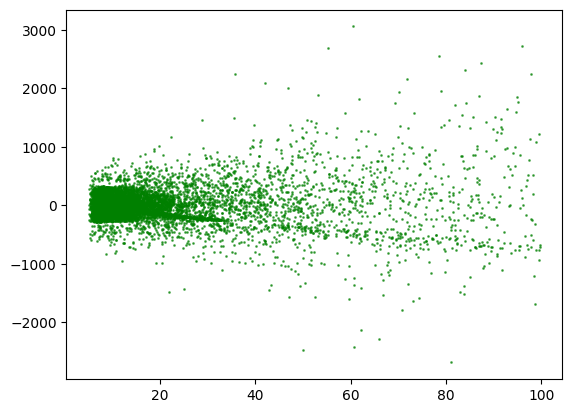

In [240]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

def remove_streaks(r, v, 
                   eps, 
                   min_samples, 
                   remove_below_size):
    """
    Identify and remove 'streaks' (small, dense clusters) from (r, v) data.
    """
    X = np.vstack([r, v]).T
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X)
    uniq, counts = np.unique(labels[labels >= 0], return_counts=True)
    cluster_sizes = dict(zip(uniq, counts))
    streak_labels = {lab for lab, sz in cluster_sizes.items() if sz < remove_below_size}
    mask_clean = np.ones_like(r, dtype=bool)
    for i, lab in enumerate(labels):
        if lab >= 0 and lab in streak_labels:
            mask_clean[i] = False
    return mask_clean, labels



# --- Apply streak removal ---
mask, labels = remove_streaks(
    r_valid, V_th_valid,
    eps=3.0,           
    min_samples=5,    
    remove_below_size=200
)

# --- Plot original, removed, and cleaned data ---
plt.figure(figsize=(10, 6))

plt.scatter(r_valid, V_th_valid, s=2, c='blue', alpha=0.3, label='Original data')
plt.scatter(r_valid[~mask], V_th_valid[~mask], s=8, c='red', alpha=0.6, label='Removed streaks')


plt.xlabel('r [kpc]')
plt.ylabel('v [km/s]')
plt.title('Synthetic Data: Streak Removal via DBSCAN')
plt.legend(markerscale=2, loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.scatter(r_valid[mask], V_th_valid[mask], s=1, c='green', alpha=0.6, label='Cleaned background')
plt.show


(0.0, 1.0)

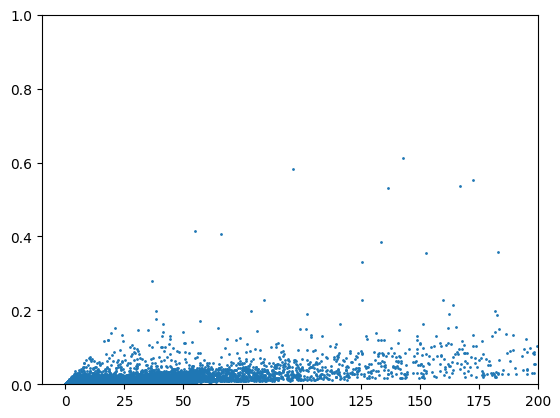

In [14]:
d = (cep_clean['parallax'].values * u.mas).to(u.kpc, u.parallax())
plt.scatter(d,rel_parallax_error/100,s=1)
plt.xlim(-10,200)
plt.ylim(0,1)

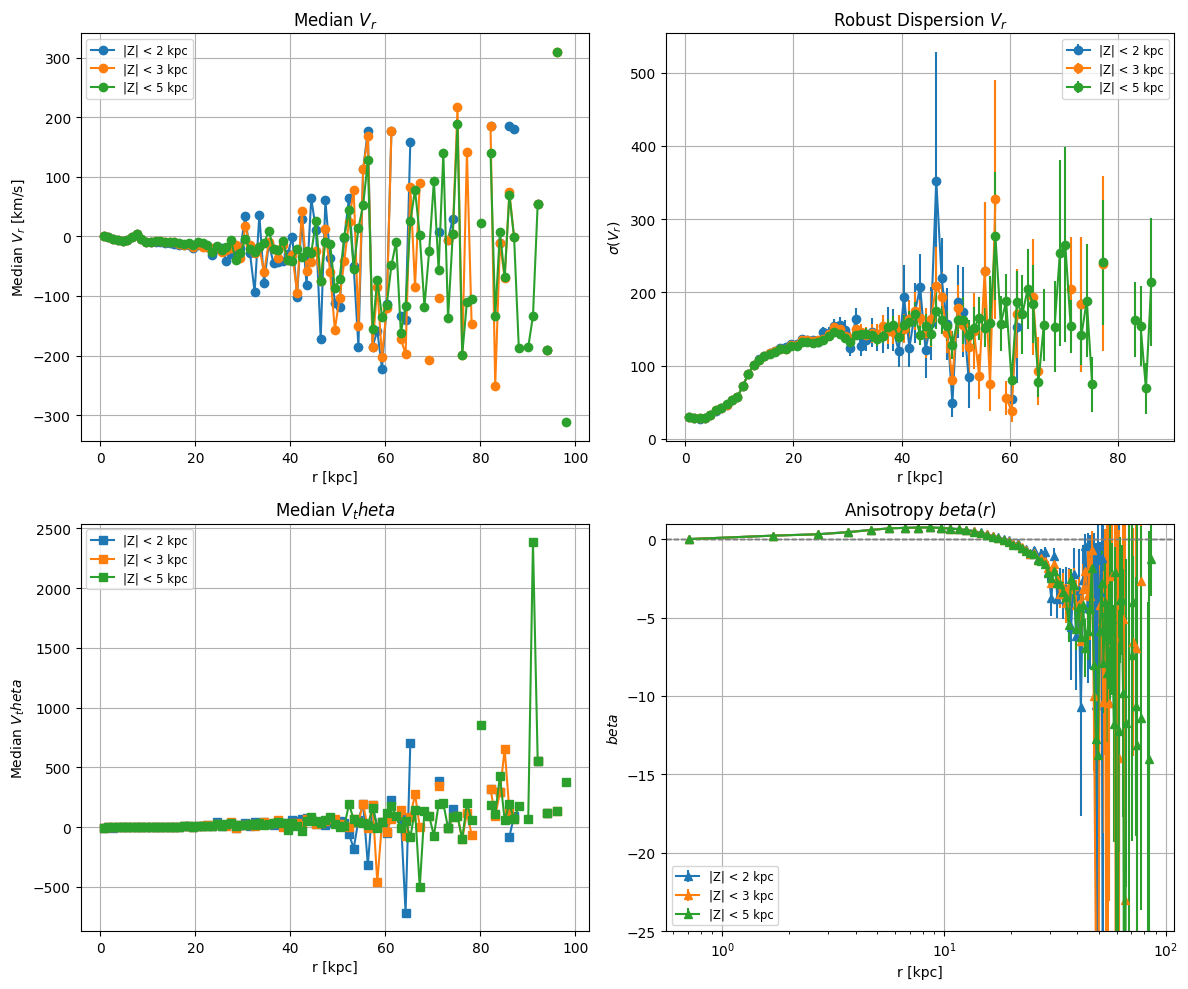

In [18]:
import numpy as np
import pandas as pd
import astropy.units as u
from astropy.coordinates import SkyCoord, Galactocentric
import matplotlib.pyplot as plt

# ----------------------------------------
# 1. Load and clean data
# ----------------------------------------
file_path = "TRGB_Gaia_new-result.csv"
cep = pd.read_csv(file_path)
required_cols = ['ra','dec','parallax','pmra','pmdec','radial_velocity','l','b']
cep_clean = cep.dropna(subset=required_cols)

# ----------------------------------------
# 2. Convert to astropy quantities
# ----------------------------------------
ra = cep_clean['ra'].values * u.deg
dec = cep_clean['dec'].values * u.deg
distance = (cep_clean['parallax'].values * u.mas).to(u.kpc, u.parallax())
pm_ra = cep_clean['pmra'].values * u.mas / u.yr
pm_dec = cep_clean['pmdec'].values * u.mas / u.yr
rv = cep_clean['radial_velocity'].values * u.km / u.s

# ----------------------------------------
# 3. Galactocentric constants
# ----------------------------------------
U_sun, V_sun, W_sun = 11.1*u.km/u.s, 12.24*u.km/u.s, 7.25*u.km/u.s
R0 = -8.1 * u.kpc
z_sun = 0.020 * u.kpc

# ----------------------------------------
# 4. Transform function
# ----------------------------------------
def transform_to_galactocentric(ra, dec, dist, pmra, pmdec, rv):
    icrs = SkyCoord(ra=ra, dec=dec, distance=dist,
                    pm_ra_cosdec=pmra, pm_dec=pmdec,
                    radial_velocity=rv)
    galcen = icrs.transform_to(Galactocentric(
        galcen_distance=R0, z_sun=z_sun,
        galcen_v_sun=[U_sun, V_sun, W_sun]))
    X, Y, Z = galcen.x.value, galcen.y.value, galcen.z.value
    U, V, W = galcen.v_x.value, galcen.v_y.value, galcen.v_z.value
    r = np.sqrt(X**2 + Y**2 + Z**2)
    phi = np.arctan2(Y, X)
    theta = np.pi/2 - np.arctan2(Z, np.sqrt(X**2 + Y**2))
    V_r = (U*np.cos(phi) + V*np.sin(phi))*np.sin(theta) + W*np.cos(theta)
    V_t = (U*np.cos(phi) + V*np.sin(phi))*np.cos(theta) - W*np.sin(theta)
    V_p = U*np.sin(phi) - V*np.cos(phi)
    return r, Z, V_r, V_t, V_p

# Perform transformation once
r, z, V_r, V_t, V_p = transform_to_galactocentric(
    ra, dec, distance, pm_ra, pm_dec, rv)

# Radial mask
r_mask = (r < 100)

# Z-thresholds to test
z_thresholds = [2, 3, 5]  # in kpc
labels = ["|Z| < 2 kpc", "|Z| < 3 kpc", "|Z| < 5 kpc"]
colors = ['C0','C1','C2']

# Prepare 2×2 panel
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# Loop over thresholds
for zmax, label, c in zip(z_thresholds, labels, colors):
    mask = r_mask & (np.abs(z) < zmax)
    r_valid = r[mask]
    Vrv = V_r[mask]
    Vtv = V_t[mask]
    Vpv = V_p[mask]

    # Bin
    bins = np.histogram_bin_edges(r_valid, bins=100)
    centers = 0.5*(bins[:-1] + bins[1:])
    n = len(centers)
    med_r, med_t, med_p = np.full(n, np.nan), np.full(n, np.nan), np.full(n, np.nan)
    sigma_r, sigma_t, sigma_p = np.full(n, np.nan), np.full(n, np.nan), np.full(n, np.nan)
    err_r, err_t, err_p = np.full(n, np.nan), np.full(n, np.nan), np.full(n, np.nan)

    # Stats per bin
    for i in range(n):
        bin_mask = (r_valid >= bins[i]) & (r_valid < bins[i+1])
        Nv = bin_mask.sum()
        if Nv < 1:
            continue
        vrb = Vrv[bin_mask]; vtb = Vtv[bin_mask]; vpb = Vpv[bin_mask]
        med_r[i] = np.median(vrb)
        med_t[i] = np.median(vtb)
        med_p[i] = np.median(vpb)
        if Nv >= 3:
            # robust sigma function as defined above
            sigma_r[i] = robust_sigma(vrb)
            sigma_t[i] = robust_sigma(vtb)
            sigma_p[i] = robust_sigma(vpb)
            err_r[i] = sigma_r[i]/np.sqrt(2*(Nv-1))
            err_t[i] = sigma_t[i]/np.sqrt(2*(Nv-1))
            err_p[i] = sigma_p[i]/np.sqrt(2*(Nv-1))

    # Compute beta
    beta = 1 - (sigma_t**2 + sigma_p**2)/(2*sigma_r**2)
    db_dsr = (sigma_t**2 + sigma_p**2)/(sigma_r**3)
    db_dst = -sigma_t/(sigma_r**2)
    db_dsp = -sigma_p/(sigma_r**2)
    beta_err = np.sqrt((db_dsr*err_r)**2 + (db_dst*err_t)**2 + (db_dsp*err_p)**2)

    # Panel 1: median V_r
    axes[0,0].plot(centers, med_r, marker='o', linestyle='-', color=c, label=label)
    axes[0,0].set(xlabel='r [kpc]', ylabel='Median $V_r$ [km/s]', title='Median $V_r$')

    # Panel 2: robust sigma V_r
    axes[0,1].errorbar(centers, sigma_r, yerr=err_r, fmt='o-', color=c, label=label)
    axes[0,1].set(xlabel='r [kpc]', ylabel='$\sigma(V_r)$', title='Robust Dispersion $V_r$')

    # Panel 3: median V_t
    axes[1,0].plot(centers, med_t, marker='s', linestyle='-', color=c, label=label)
    axes[1,0].set(xlabel='r [kpc]', ylabel='Median $V_theta$', title='Median $V_theta$')

    # Panel 4: beta
    axes[1,1].errorbar(centers, beta, yerr=beta_err, fmt='^-', color=c, label=label)
    axes[1,1].axhline(0, linestyle='--', color='gray', lw=1)
    axes[1,1].set(xlabel='r [kpc]', ylabel='$beta$', xscale='log',ylim=(-25, 1), title='Anisotropy $beta(r)$')

# Legends and formatting
for ax in axes.flat:
    ax.legend(fontsize='small')
    ax.grid(True)
    # ensure square aspect if desired:
    # ax.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24232\3020647863.py:127: RuntimeWarning: invalid value encountered in divide
  beta = 1 - (sigma_t**2+sigma_p**2)/(2*sigma_r**2)


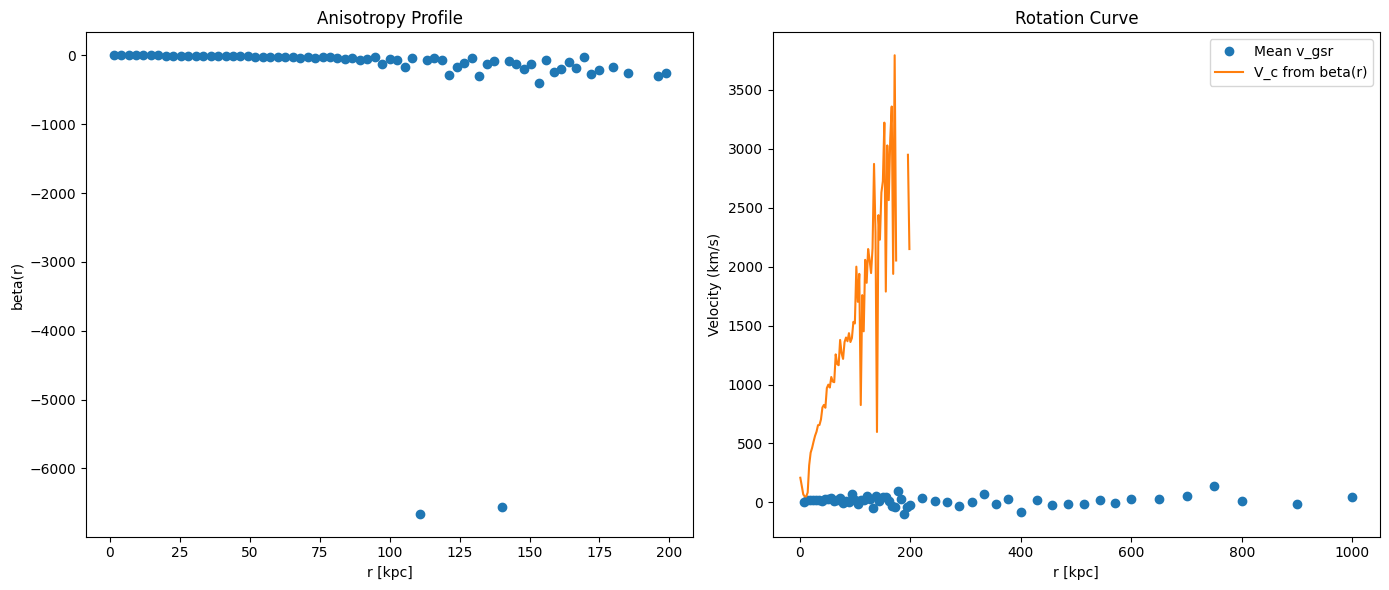